In [1]:
import pandas as pd

df = pd.read_excel("thrombolyse.xlsx", engine='openpyxl')

# Afficher les premières lignes
df.head()

,ndossier,Age,sexe,latéralité,Tabac,alcool,Neffa,sedentarité,HTA,Diabète,...,décompensationdediabète,hypernatrémie,tbhémostase,escarre,phlébite,EP,Mortalité,mannitol,RANKINmodifiéà3mois,thrombolyse
0,626/2018,48,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,5,1
1,123/2019,66,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
2,161/2019,37,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,288/2019,53,2,1,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,2,1
4,281/2019,68,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1


In [2]:
# Afficher les types de varaibles
df.dtypes

ndossier               object
Age                     int64
sexe                    int64
latéralité              int64
Tabac                   int64
                        ...  
EP                      int64
Mortalité               int64
mannitol                int64
RANKINmodifiéà3mois     int64
thrombolyse             int64
Length: 62, dtype: object

In [3]:
# Afficher les variables manquantes
df.isna()

,ndossier,Age,sexe,latéralité,Tabac,alcool,Neffa,sedentarité,HTA,Diabète,...,décompensationdediabète,hypernatrémie,tbhémostase,escarre,phlébite,EP,Mortalité,mannitol,RANKINmodifiéà3mois,thrombolyse
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
191,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
192,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
193,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# Afficher les variables catégoriques 
df.describe(include = "object") 
#Elle affiche la variable dominante

,ndossier
count,195
unique,194
top,176/20
freq,2


In [5]:
# Listes pour stocker les noms des variables
variables_nominales = []
variables_quantitatives = []

# Identification 
for col in df.columns[1:]:
    nb_uniques = df[col].nunique()

    if nb_uniques <= 5:
        variables_nominales.append(col)
    else:
        variables_quantitatives.append(col)

# Affichage des listes des variables quantitatives et nominales
print("Variables nominales :", variables_nominales)
print("\nVariables quantitatives :", variables_quantitatives)

Variables nominales : ['sexe', 'latéralité', 'Tabac', 'alcool', 'Neffa', 'sedentarité', 'HTA', 'Diabète', 'Dyslipidémie', 'ACFA', 'insuffisancecoronaire', 'valvulopathie', 'AVC', 'AIT', 'AOMI', 'démence', 'tdmnormale', 'signesprécocestdm', 'hypodensité franche', 'TDMcàH24', 'sylviensuperf', 'sylvientotal', 'sylvienprof', 'cérébraleant', 'cérebralpost', 'jonctionnelant', 'jonctionnelpost', 'tronccérebral', 'cervelet', 'lacunes', 'CE', 'oedeme', 'effetdemasse', 'engagement', 'hydrocéphalie', 'transformation_hémorragique', 'infectionurinaire', 'infectionpulmonaire', 'décompensationdediabète', 'hypernatrémie', 'tbhémostase', 'escarre', 'phlébite', 'EP', 'Mortalité', 'mannitol', 'thrombolyse']

Variables quantitatives : ['Age', 'Délai_début_symtomatologie_arrivée_URG', 'délai_début_avis_neuro', 'délai_début_imagerie', 'scoredeglasgow', 'NIHSS initial', 'TAS', 'TAD', 'GAD', 'Plaquettes', 'TP', 'INR', 'NIHSSàlasortie', 'RANKINmodifiéà3mois']


In [6]:
# Calculer les caractéristiques pour chaque variable quantitative
for col in variables_quantitatives:
    print(f"\n-------Analyse de la variable {col}-------")
    
    # Caractéristiques de position
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    
    # Caractéristiques de dispersion
    variance = df[col].var()
    std_dev = df[col].std()
    
    # Caractéristiques de forme
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    
    # Affichage des résultats
    print(f"Moyenne : {mean}")
    print(f"Médiane : {median}")
    print(f"Mode : {mode}")
    print(f"Variance : {variance}")
    print(f"Écart-type : {std_dev}")
    print(f"Asymétrie (Skewness) : {skewness}")
    print(f"Aplatissement (Kurtosis) : {kurtosis}")


-------Analyse de la variable Age-------
Moyenne : 68.11282051282052
Médiane : 69.0
Mode : 80
Variance : 204.14184509648425
Écart-type : 14.287821565812061
Asymétrie (Skewness) : -0.5199168722320281
Aplatissement (Kurtosis) : -0.11076467173227522

-------Analyse de la variable Délai_début_symtomatologie_arrivée_URG-------
Moyenne : 622.2307692307693
Médiane : 180.0
Mode : 60
Variance : 1064549.2505947645
Écart-type : 1031.7699601145425
Asymétrie (Skewness) : 2.4032913570303647
Aplatissement (Kurtosis) : 5.016891061084316

-------Analyse de la variable délai_début_avis_neuro-------
Moyenne : 786.8974358974359
Médiane : 330.0
Mode : 240
Variance : 1162773.1853026713
Écart-type : 1078.3196118510834
Asymétrie (Skewness) : 2.1641934227421995
Aplatissement (Kurtosis) : 3.9109605395841287

-------Analyse de la variable délai_début_imagerie-------
Moyenne : 933.1743589743589
Médiane : 480.0
Mode : 120
Variance : 1552574.9797515206
Écart-type : 1246.0236674122689
Asymétrie (Skewness) : 3.39583

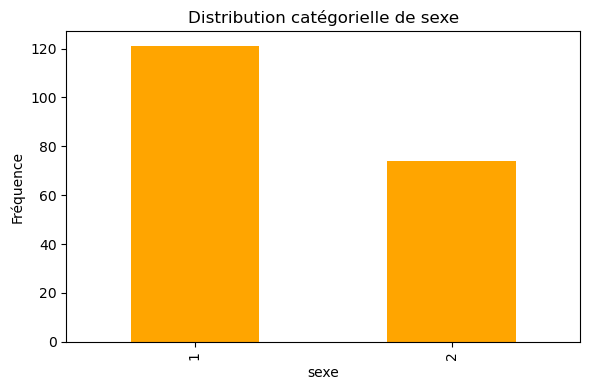

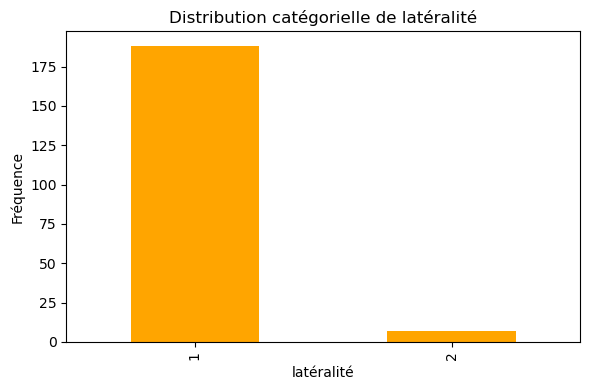

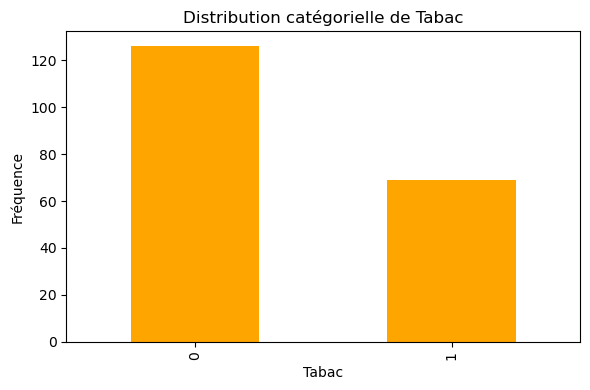

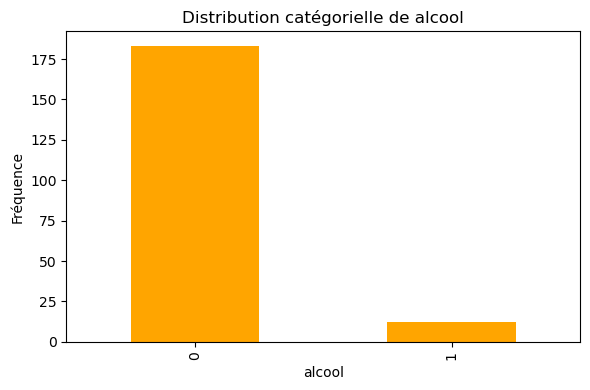

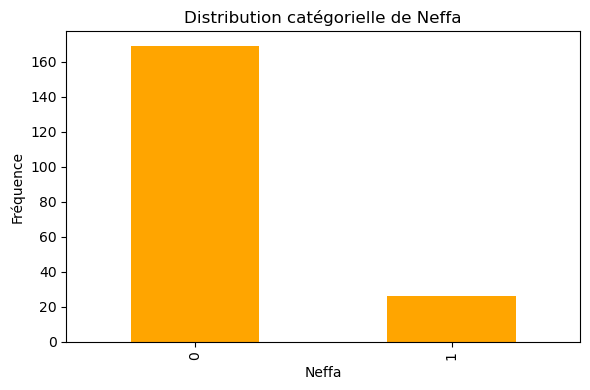

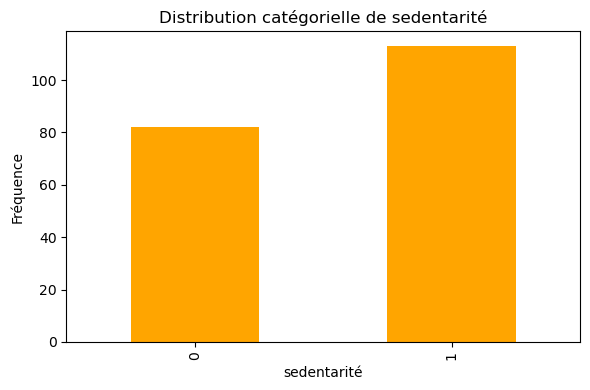

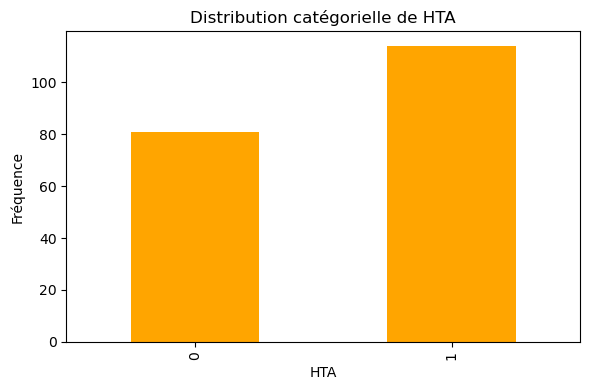

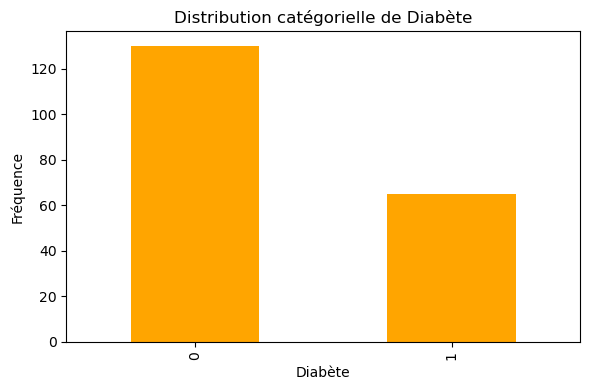

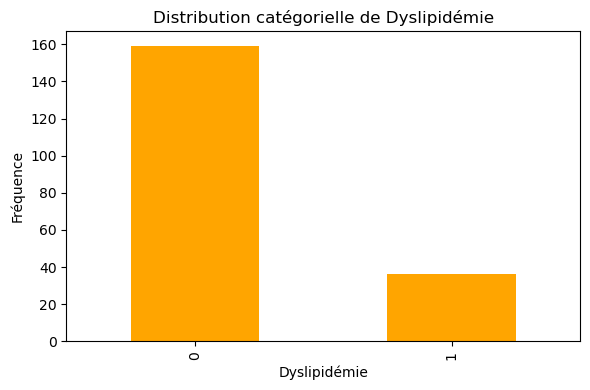

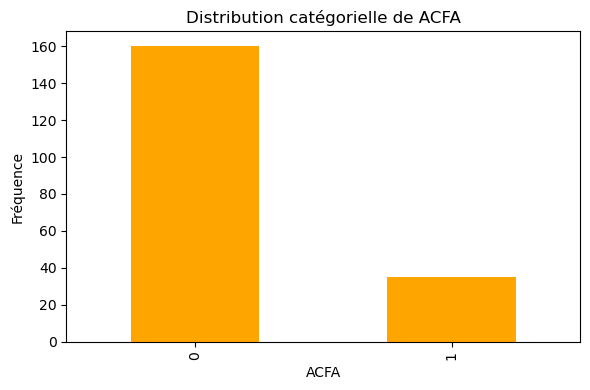

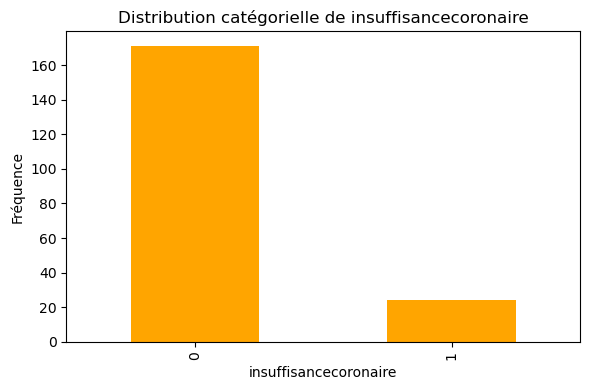

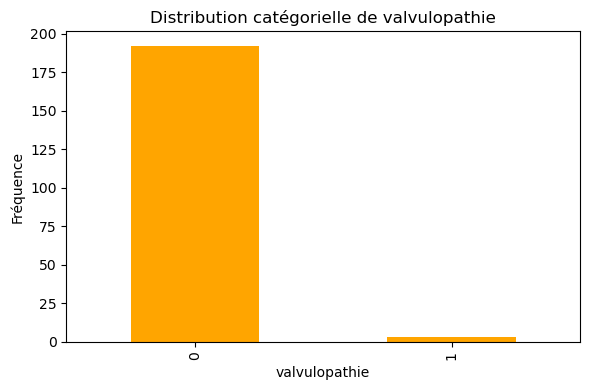

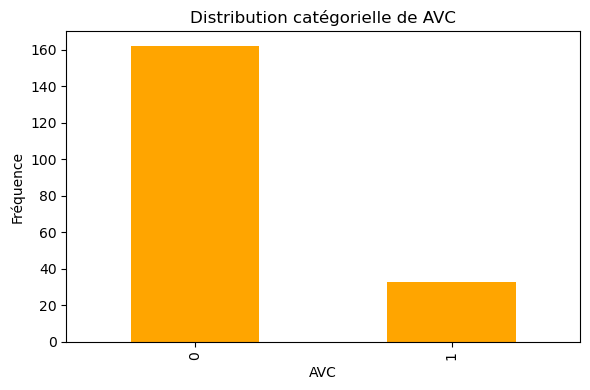

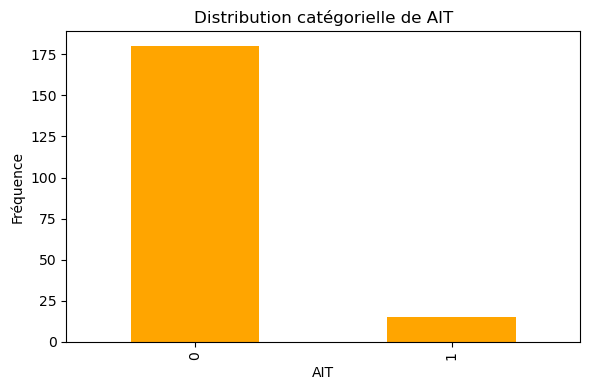

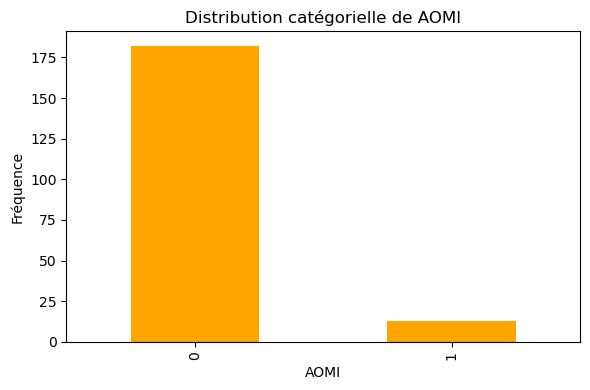

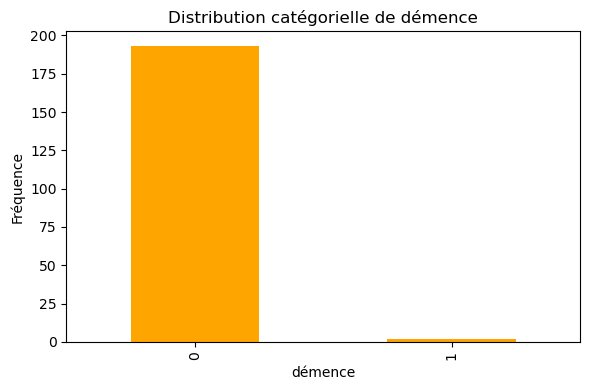

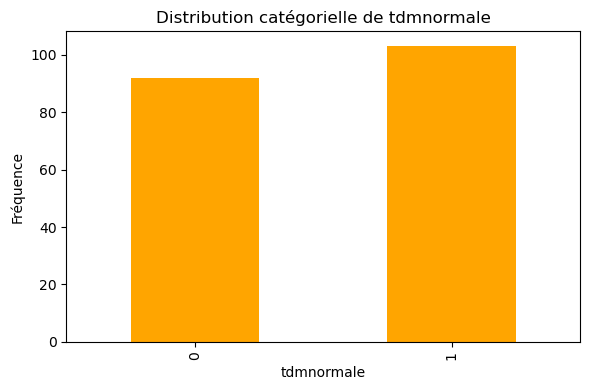

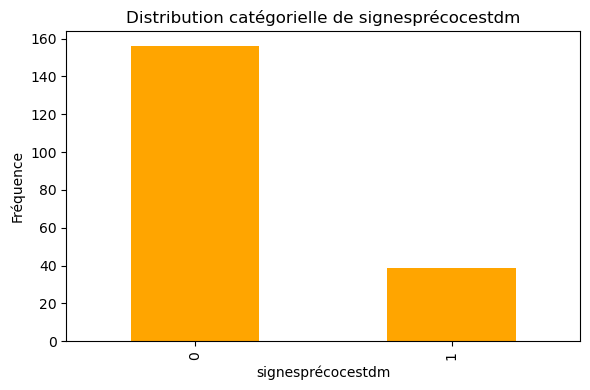

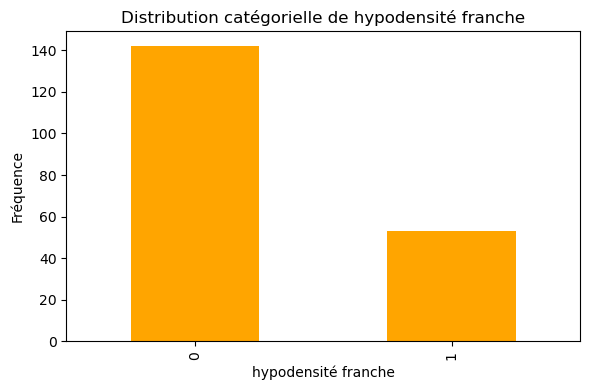

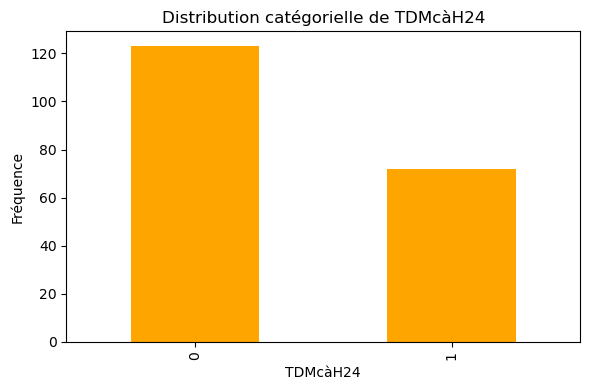

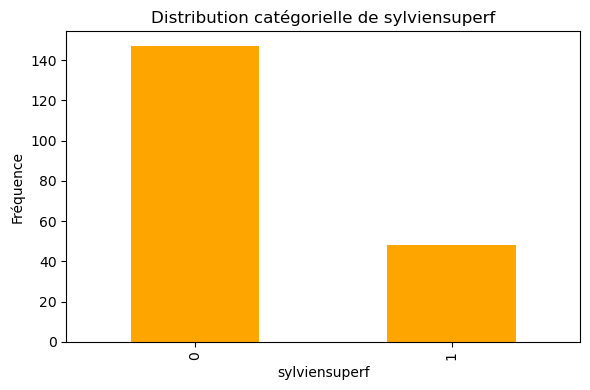

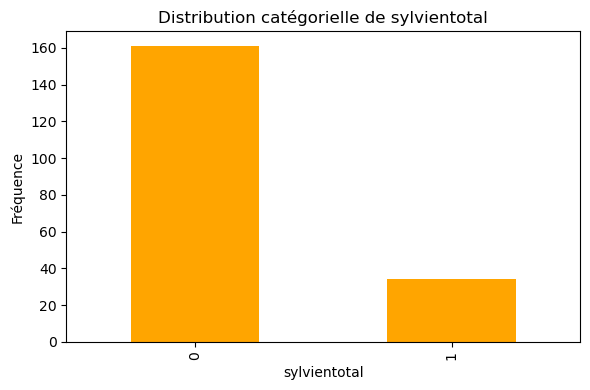

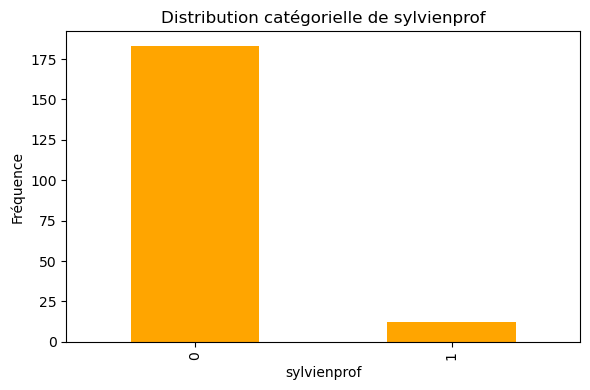

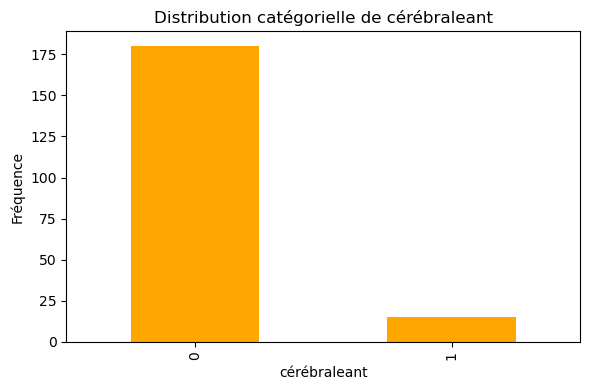

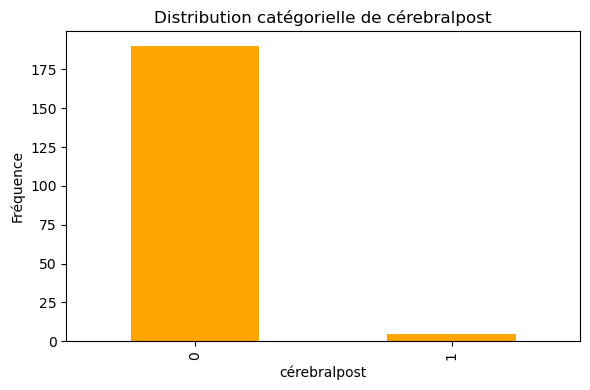

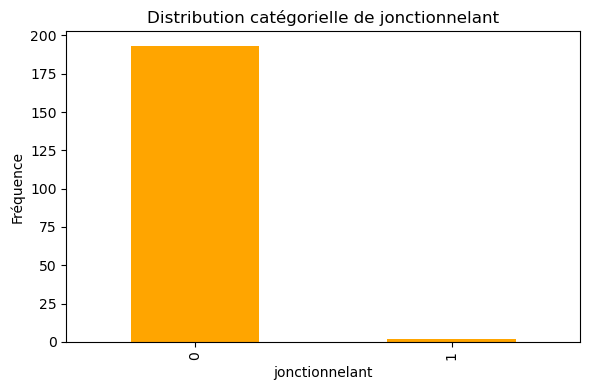

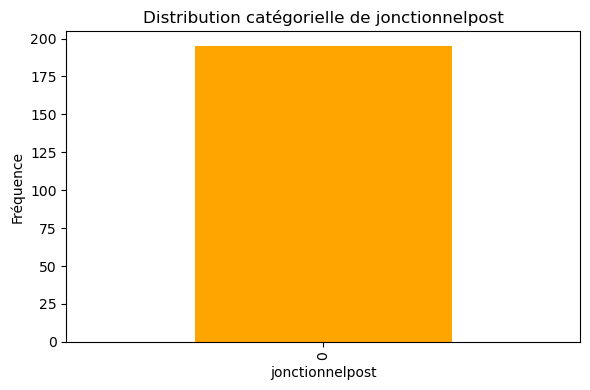

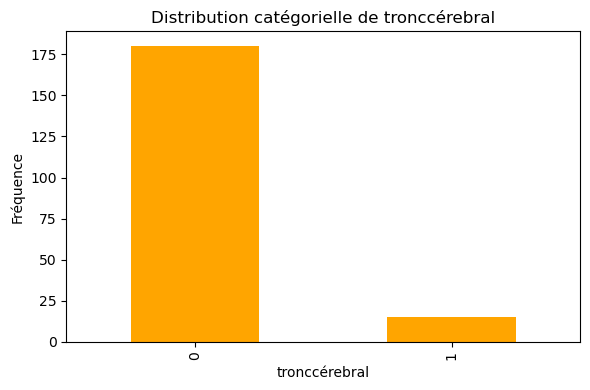

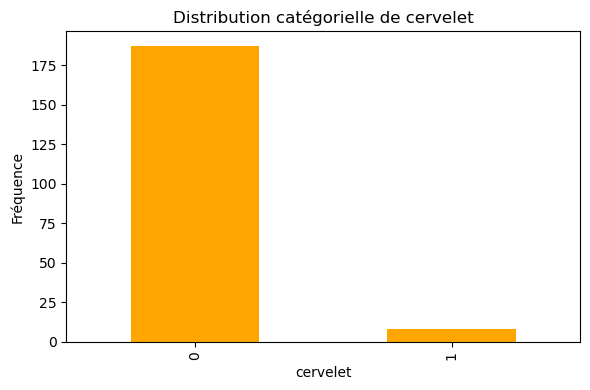

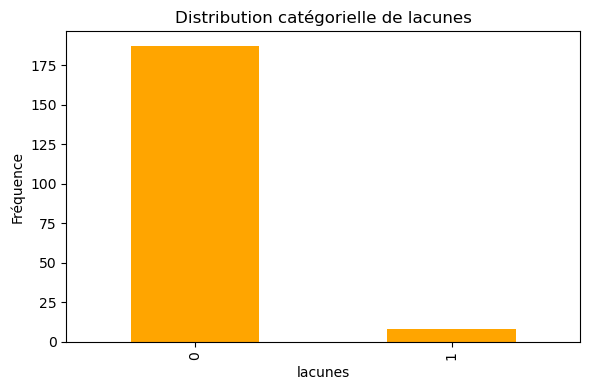

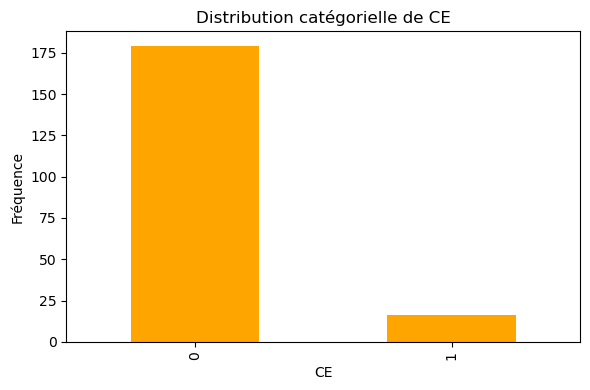

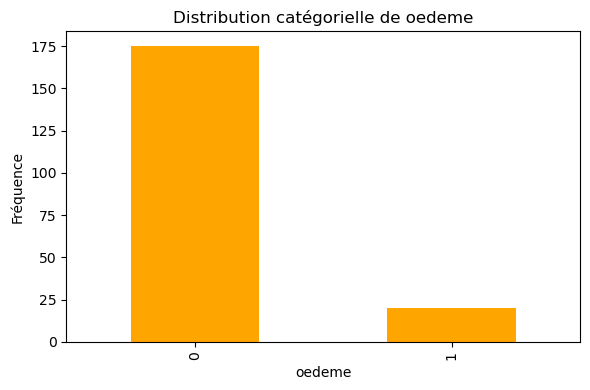

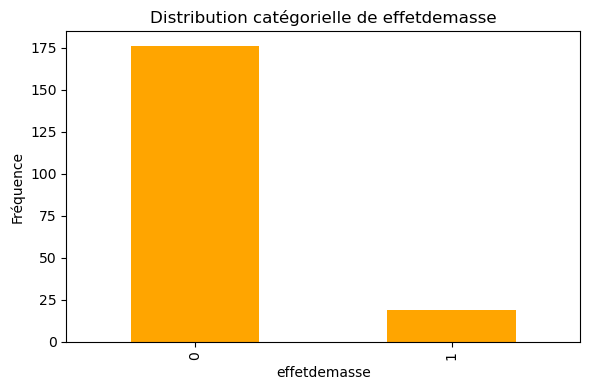

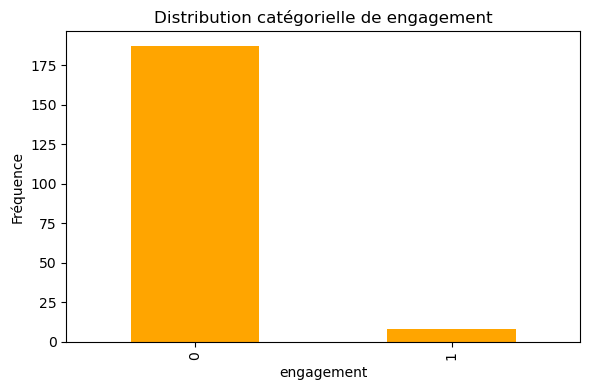

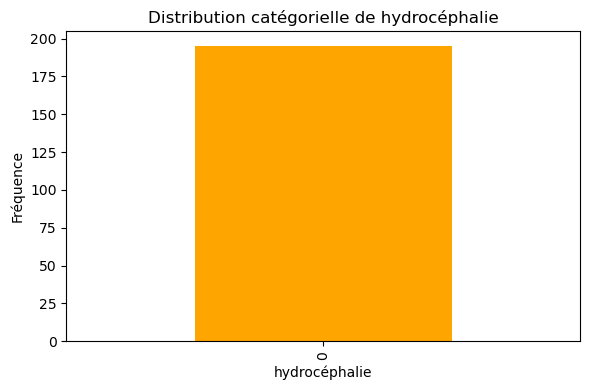

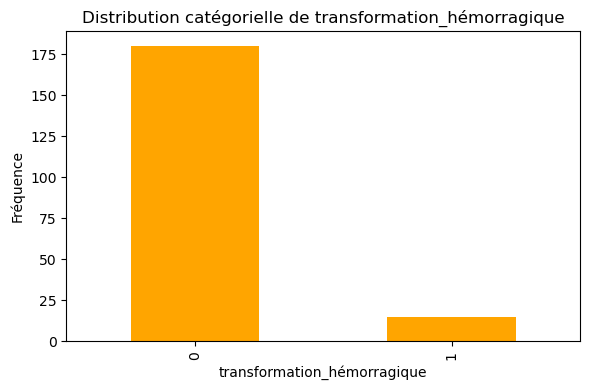

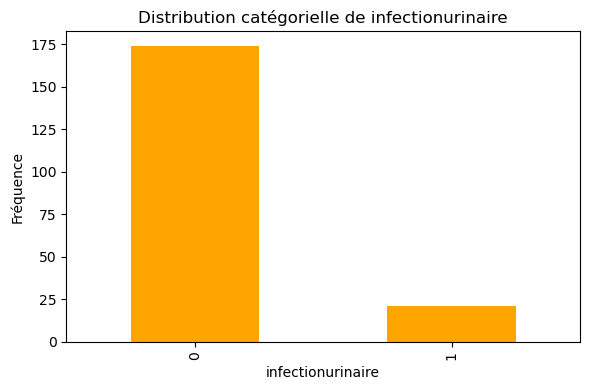

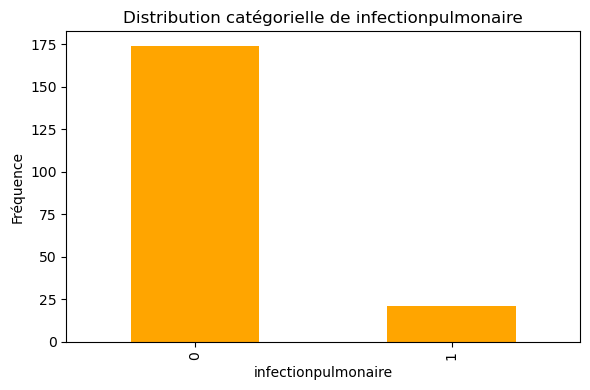

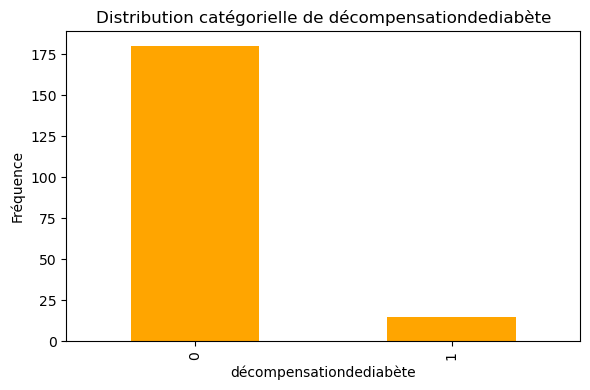

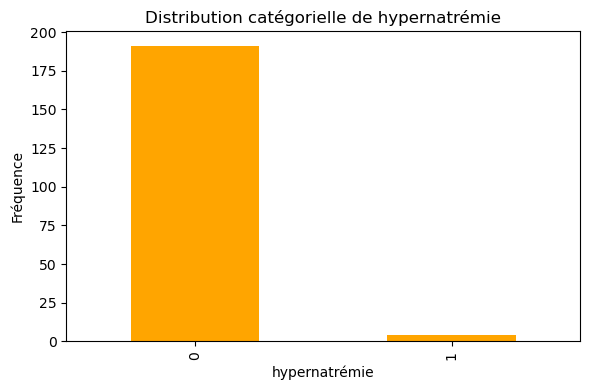

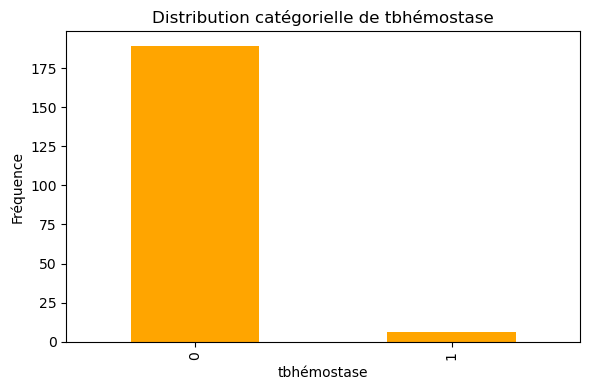

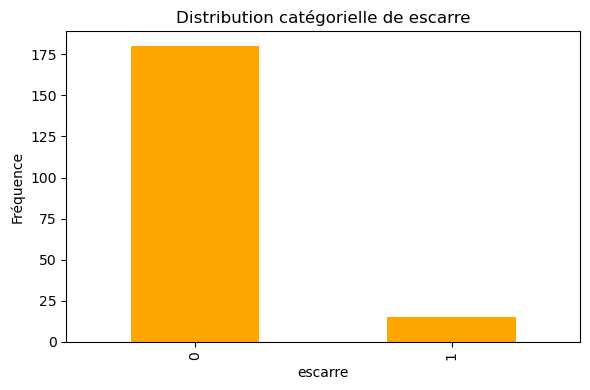

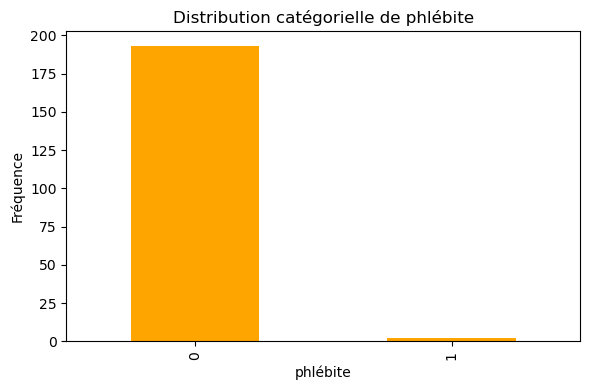

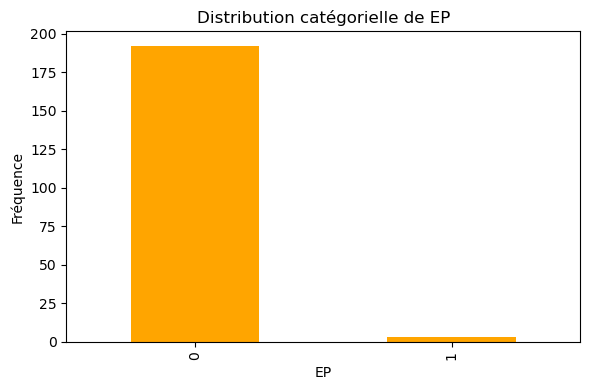

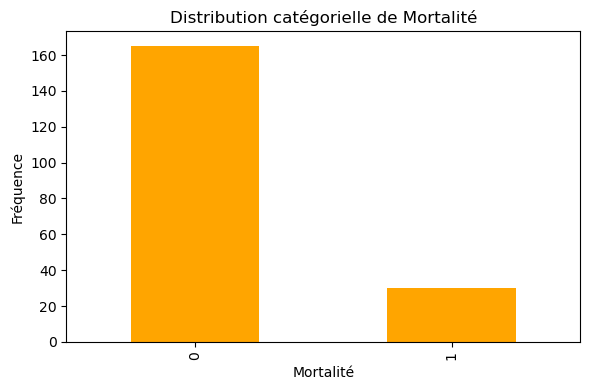

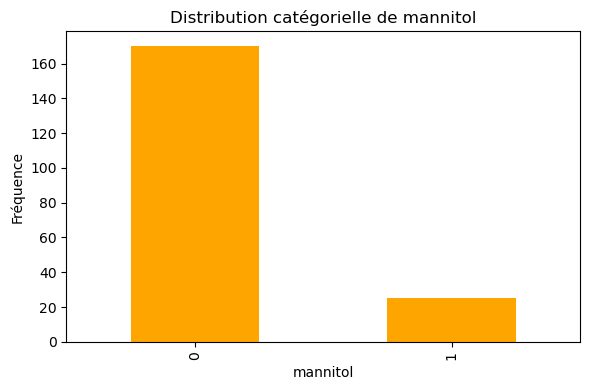

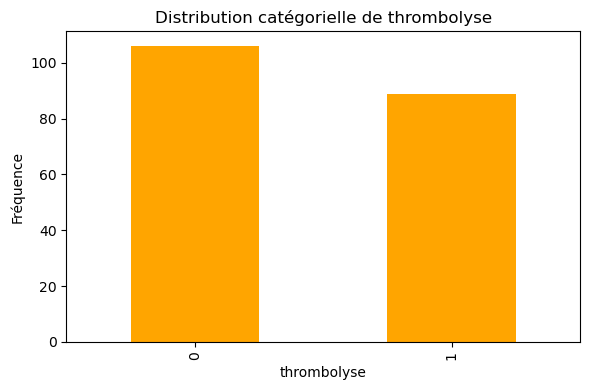

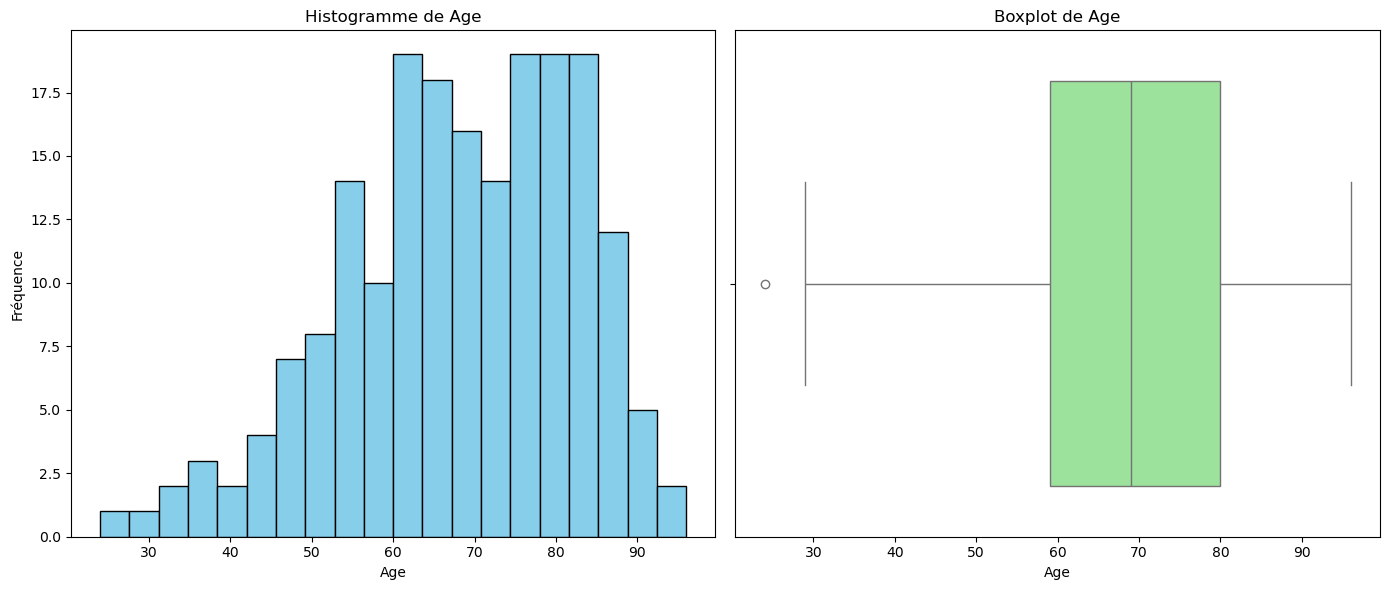

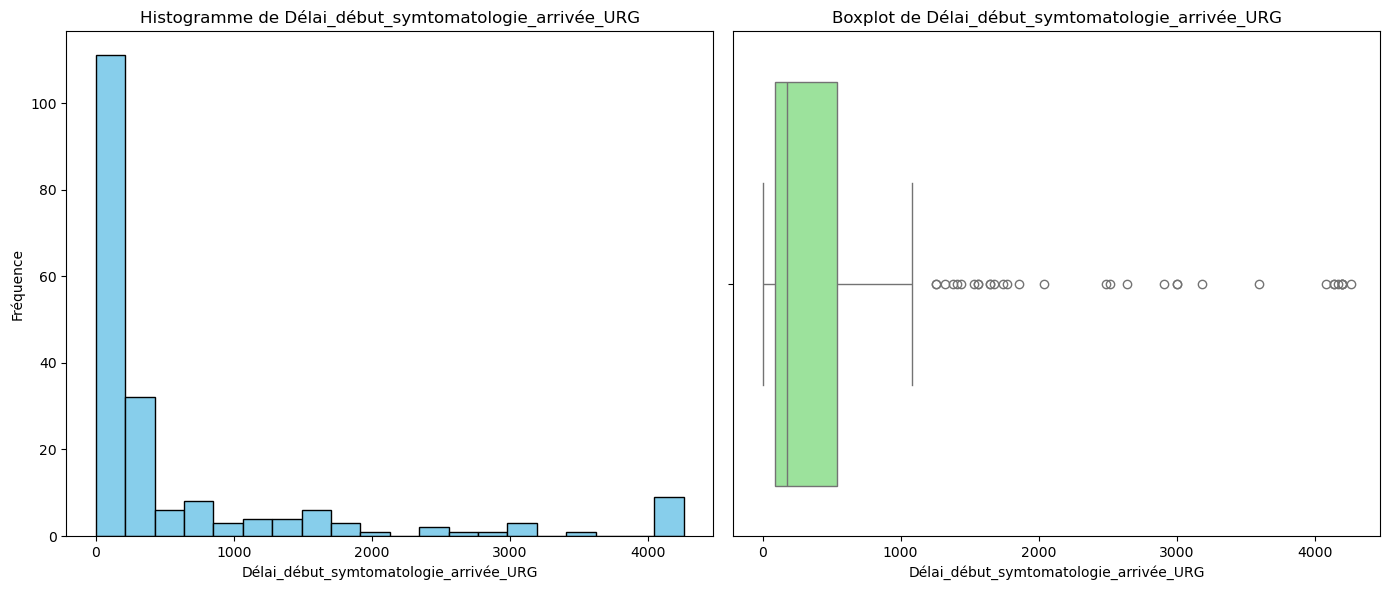

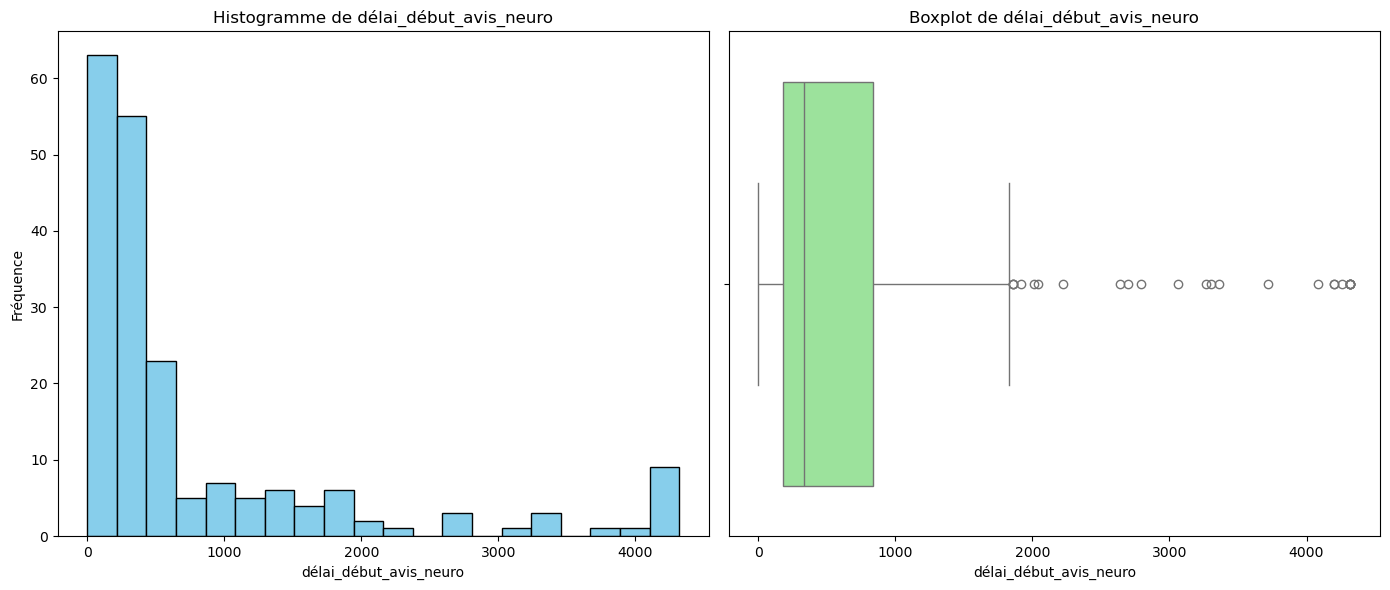

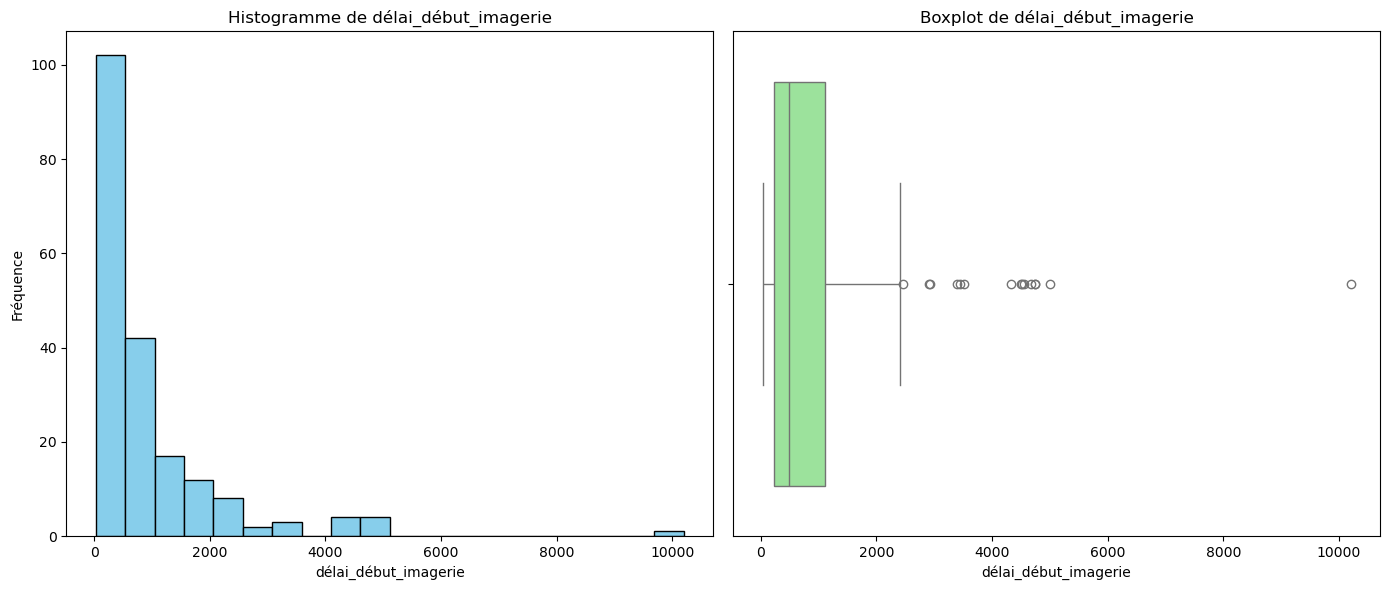

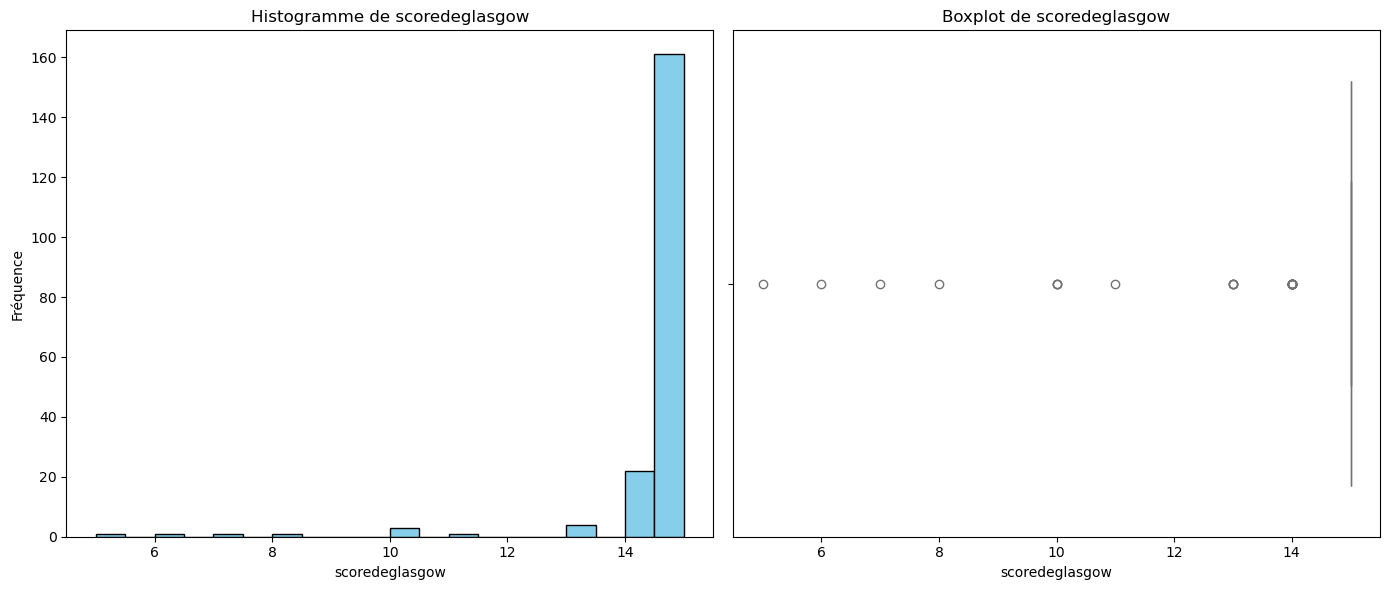

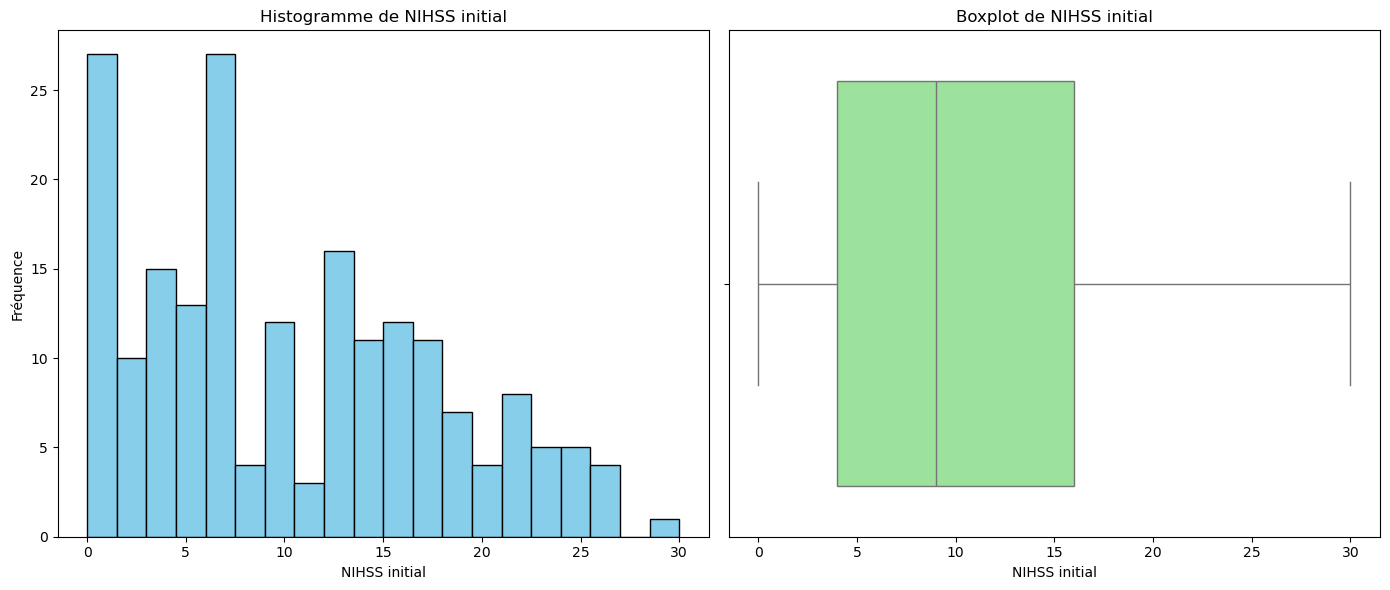

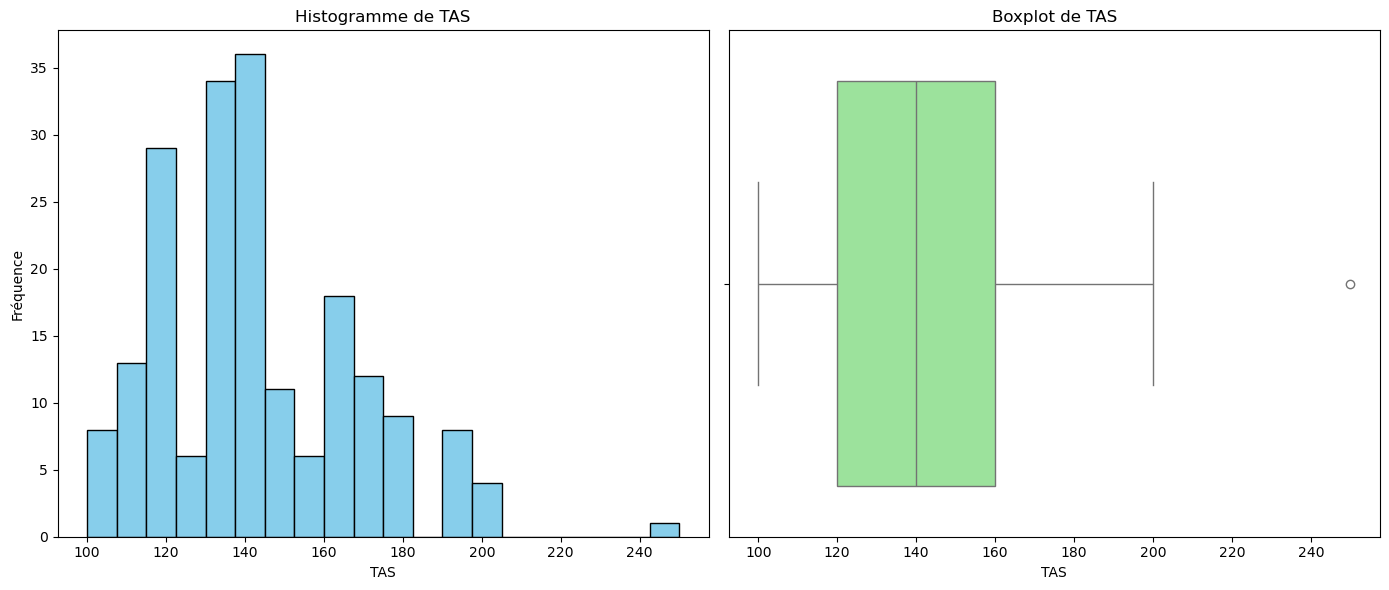

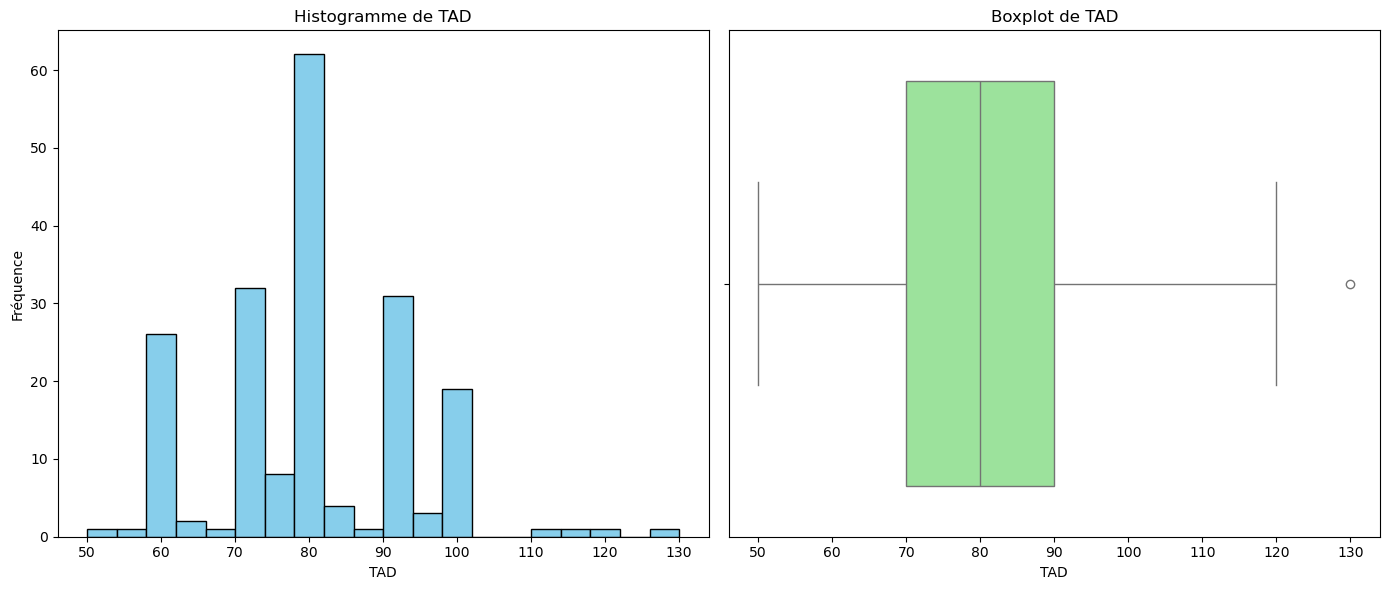

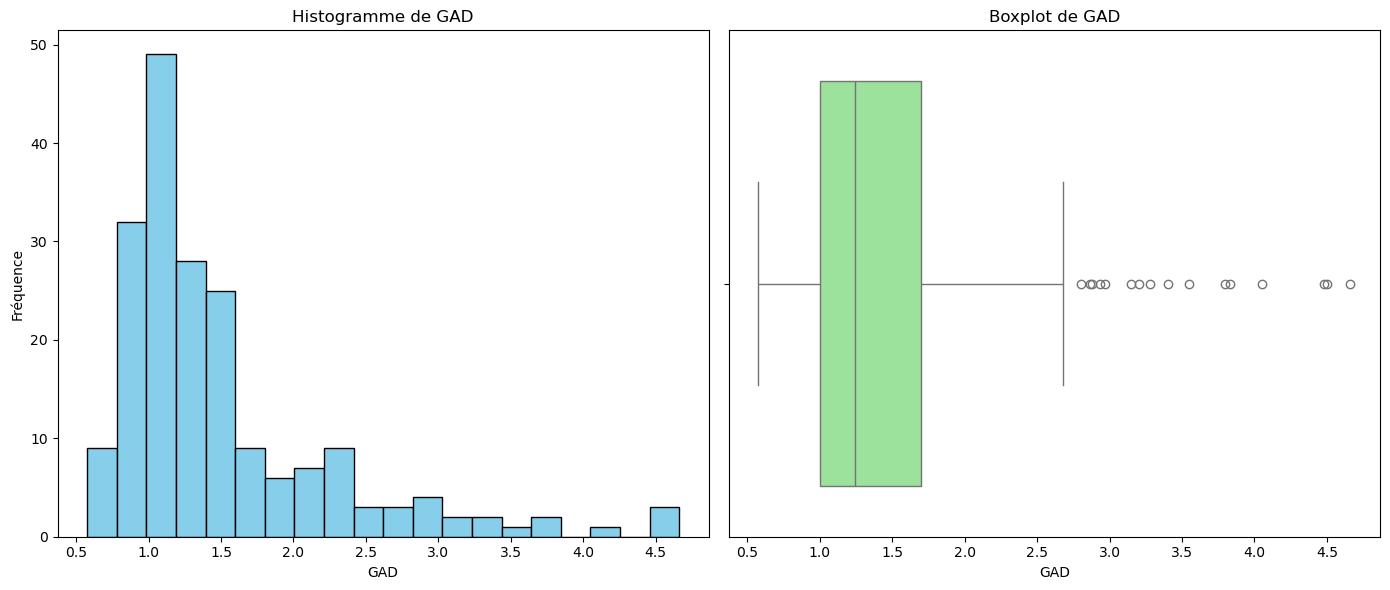

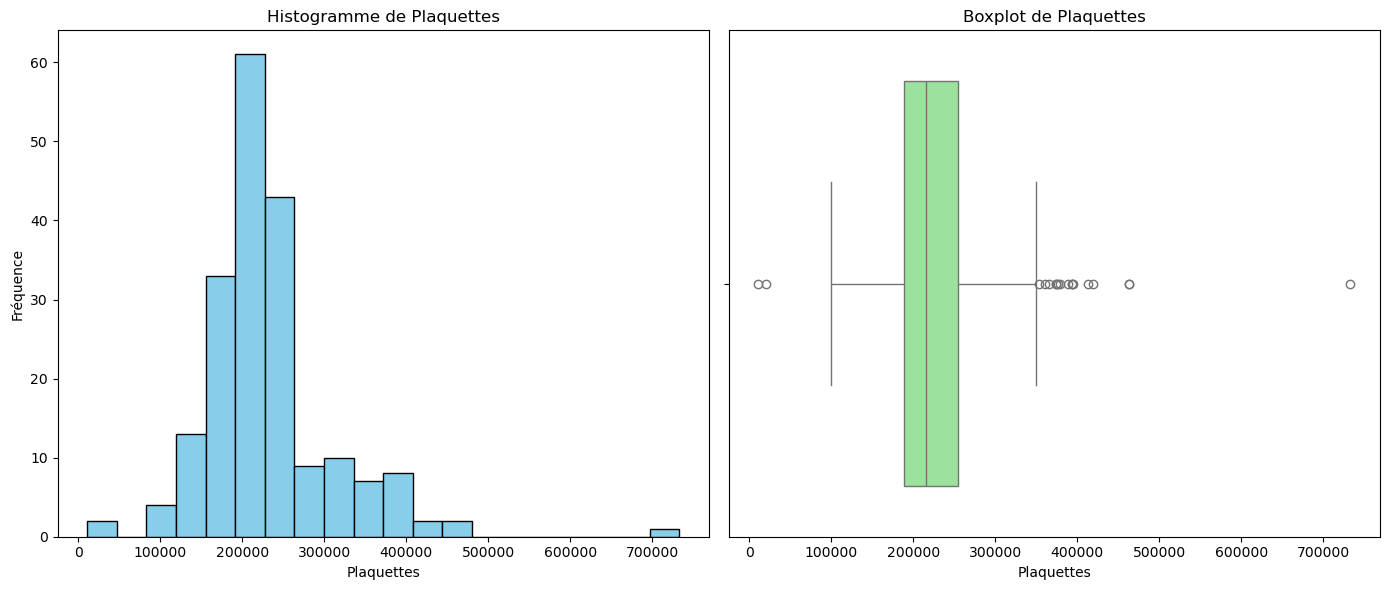

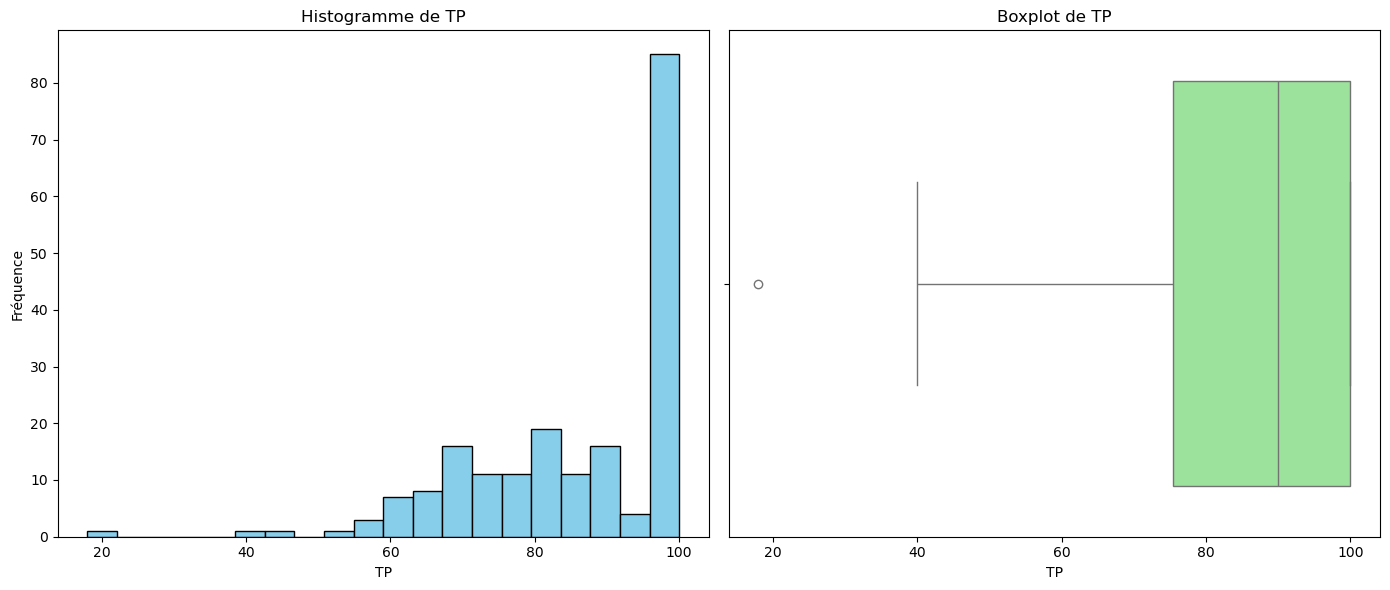

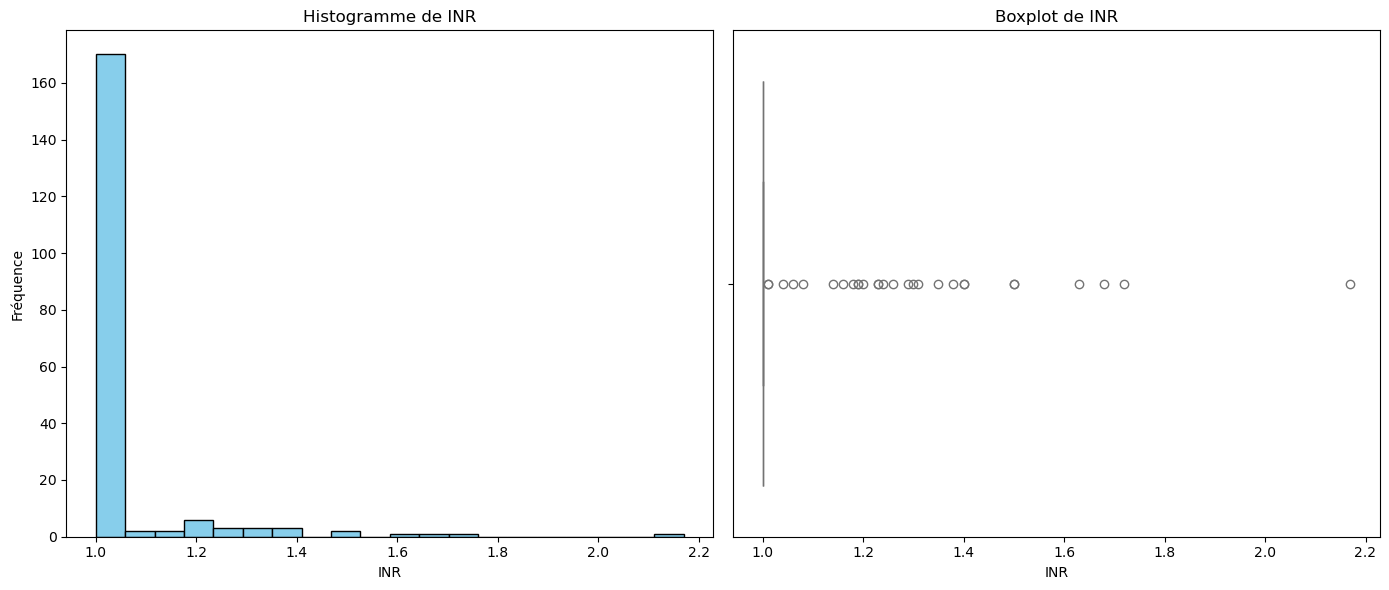

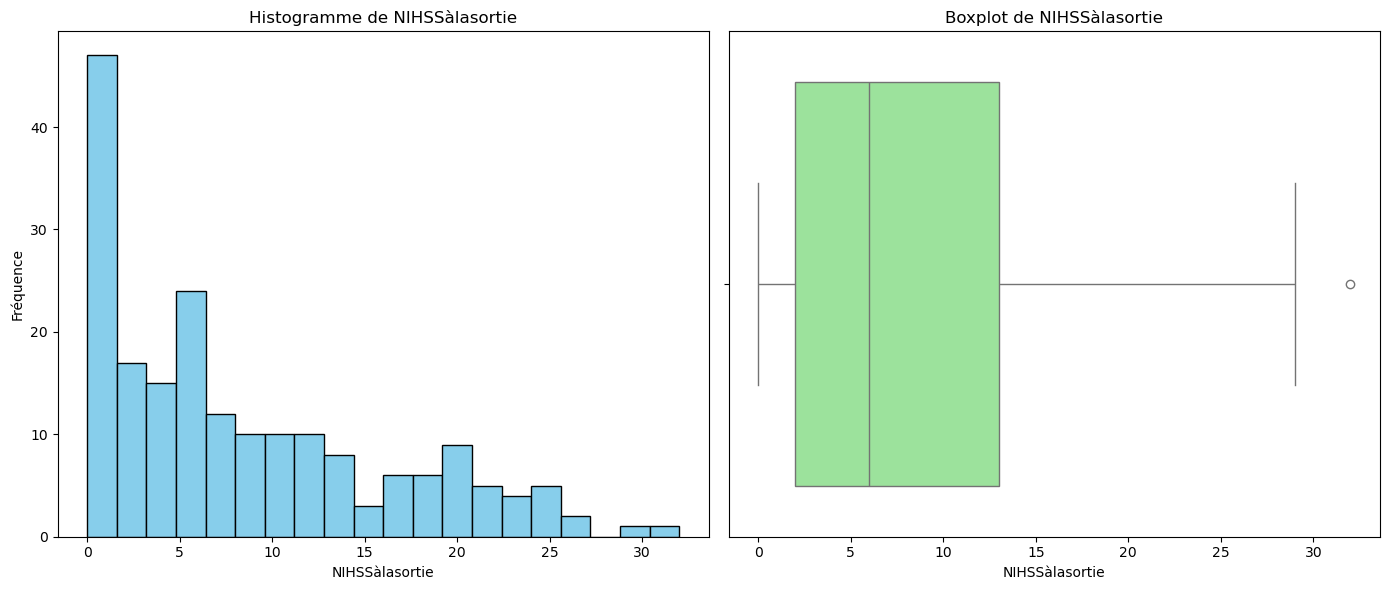

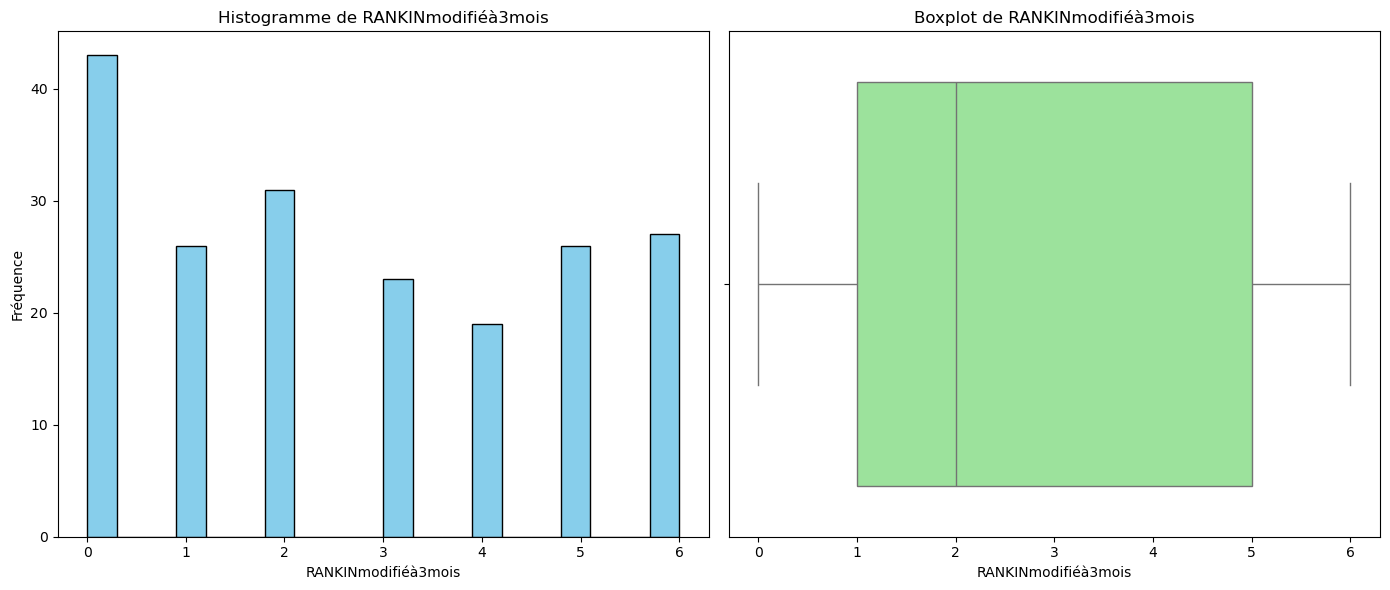

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt
# Affichage des variables nominales : bar plots
for col in variables_nominales:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().sort_index().plot(kind='bar', color='orange')
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.title(f"Distribution catégorielle de {col}")
    plt.tight_layout()
    plt.show()

# Affichage des variables quantitatives : histogramme + boxplot
for col in variables_quantitatives:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Histogramme
    axes[0].hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogramme de {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Fréquence")

    # Boxplot
    sns.boxplot(x=df[col].dropna(), ax=axes[1], color='lightgreen')
    axes[1].set_title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()

In [8]:
# Analyser et afficher les distributions pour chaque variable quantitative
for col in variables_quantitatives:
    print(f"Distribution pour {col} :")
    print(df[col].value_counts()) 
    print("\n")

Distribution pour Age :
Age
80    10
77     9
65     8
70     7
86     7
63     7
84     6
59     6
68     6
73     6
62     5
81     5
75     5
82     5
76     5
55     5
83     4
61     4
78     4
85     4
56     4
72     4
53     4
64     4
57     4
66     3
60     3
52     3
51     3
49     3
88     3
67     3
69     3
50     2
71     2
91     2
45     2
46     2
92     2
87     2
74     2
35     2
47     1
94     1
96     1
90     1
48     1
41     1
40     1
29     1
32     1
24     1
43     1
44     1
34     1
37     1
54     1
Name: count, dtype: int64


Distribution pour Délai_début_symtomatologie_arrivée_URG :
Délai_début_symtomatologie_arrivée_URG
60      22
150     15
90      15
180     13
120     11
        ..
690      1
65       1
3180     1
3600     1
1740     1
Name: count, Length: 61, dtype: int64


Distribution pour délai_début_avis_neuro :
délai_début_avis_neuro
300     12
240     12
120     11
360     10
330      8
        ..
80       1
3360     1
2640     1
4260   

In [9]:
# Analyser et afficher les distributions pour chaque variable nominales
for col in variables_nominales :
    print(f"Distribution pour {col} :")
    print(df[col].value_counts()) 
    print("\n")

Distribution pour sexe :
sexe
1    121
2     74
Name: count, dtype: int64


Distribution pour latéralité :
latéralité
1    188
2      7
Name: count, dtype: int64


Distribution pour Tabac :
Tabac
0    126
1     69
Name: count, dtype: int64


Distribution pour alcool :
alcool
0    183
1     12
Name: count, dtype: int64


Distribution pour Neffa :
Neffa
0    169
1     26
Name: count, dtype: int64


Distribution pour sedentarité :
sedentarité
1    113
0     82
Name: count, dtype: int64


Distribution pour HTA :
HTA
1    114
0     81
Name: count, dtype: int64


Distribution pour Diabète :
Diabète
0    130
1     65
Name: count, dtype: int64


Distribution pour Dyslipidémie :
Dyslipidémie
0    159
1     36
Name: count, dtype: int64


Distribution pour ACFA :
ACFA
0    160
1     35
Name: count, dtype: int64


Distribution pour insuffisancecoronaire :
insuffisancecoronaire
0    171
1     24
Name: count, dtype: int64


Distribution pour valvulopathie :
valvulopathie
0    192
1      3
Name: coun

Test de normalité pour Age:
Statistique de Shapiro-Wilk: 0.9746203326954712, p-value: 0.0013115006229581078
La variable Age ne suit pas une distribution normale (p <= 0.05).


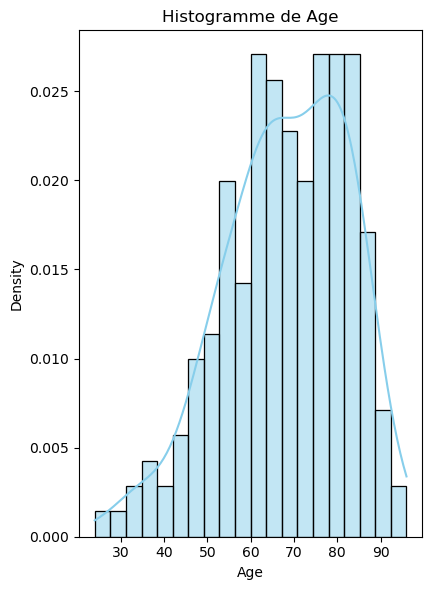

Test de normalité pour Délai_début_symtomatologie_arrivée_URG:
Statistique de Shapiro-Wilk: 0.5936032948046921, p-value: 3.2445822146890007e-21
La variable Délai_début_symtomatologie_arrivée_URG ne suit pas une distribution normale (p <= 0.05).


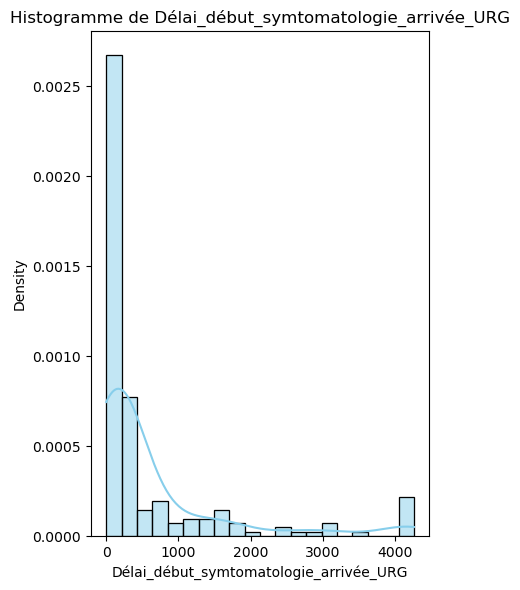

Test de normalité pour délai_début_avis_neuro:
Statistique de Shapiro-Wilk: 0.6596927305565852, p-value: 1.4308808635047296e-19
La variable délai_début_avis_neuro ne suit pas une distribution normale (p <= 0.05).


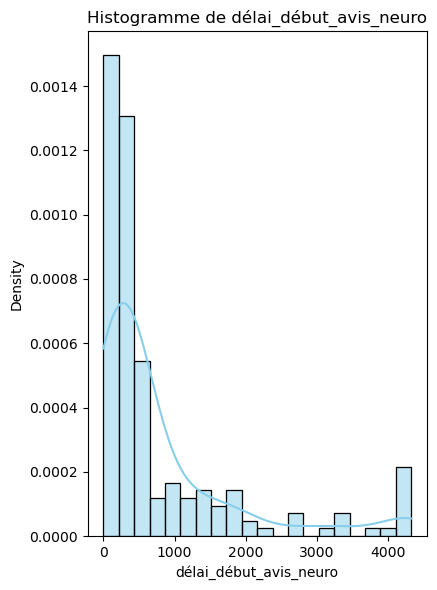

Test de normalité pour délai_début_imagerie:
Statistique de Shapiro-Wilk: 0.6435638239358508, p-value: 5.4130357877988496e-20
La variable délai_début_imagerie ne suit pas une distribution normale (p <= 0.05).


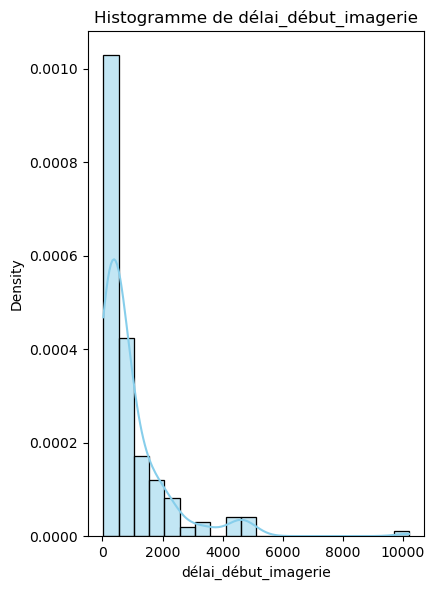

Test de normalité pour scoredeglasgow:
Statistique de Shapiro-Wilk: 0.33392973602276443, p-value: 3.604528698324638e-26
La variable scoredeglasgow ne suit pas une distribution normale (p <= 0.05).


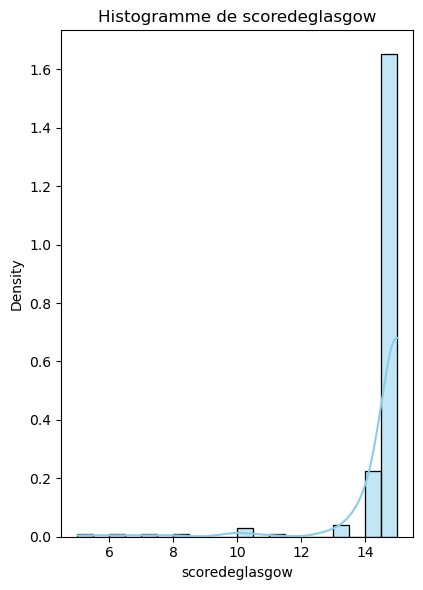

Test de normalité pour NIHSS initial:
Statistique de Shapiro-Wilk: 0.9441664123841632, p-value: 7.159636268663967e-07
La variable NIHSS initial ne suit pas une distribution normale (p <= 0.05).


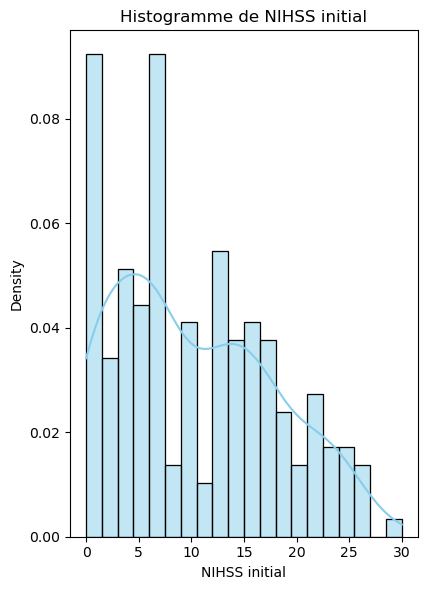

Test de normalité pour TAS:
Statistique de Shapiro-Wilk: 0.9441843362207639, p-value: 7.186164199510107e-07
La variable TAS ne suit pas une distribution normale (p <= 0.05).


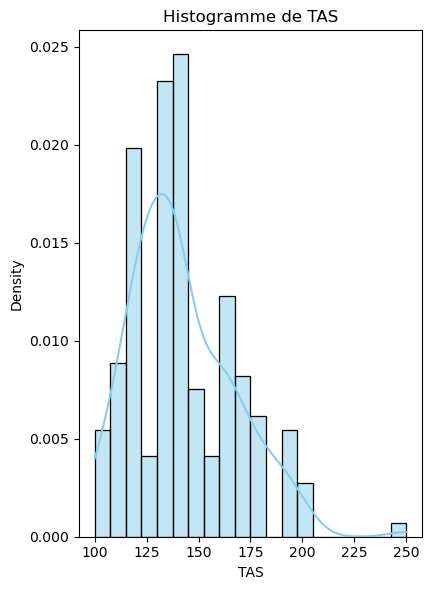

Test de normalité pour TAD:
Statistique de Shapiro-Wilk: 0.9441699128744904, p-value: 7.164809042709262e-07
La variable TAD ne suit pas une distribution normale (p <= 0.05).


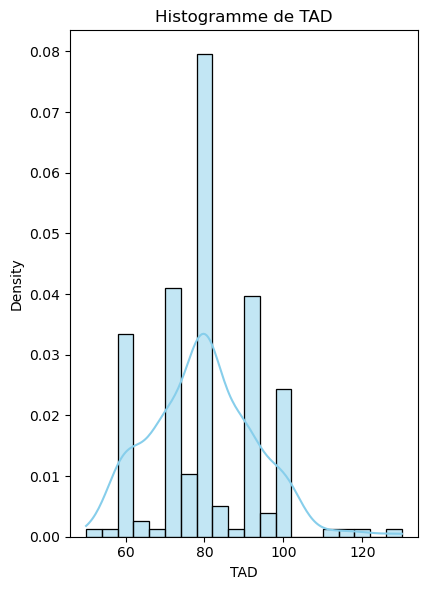

Test de normalité pour GAD:
Statistique de Shapiro-Wilk: 0.7945627900040004, p-value: 2.7670536159186774e-15
La variable GAD ne suit pas une distribution normale (p <= 0.05).


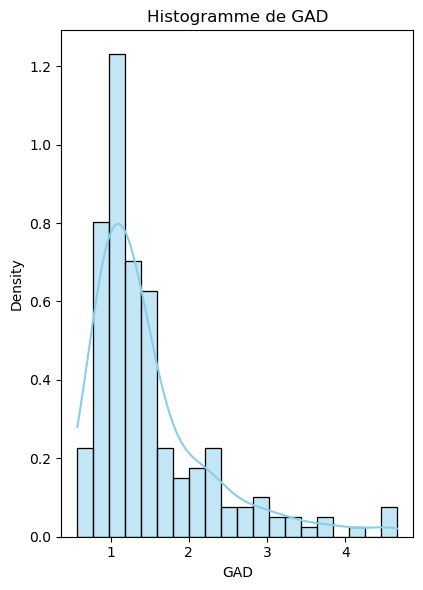

Test de normalité pour Plaquettes:
Statistique de Shapiro-Wilk: 0.8703078362707163, p-value: 7.036416412525971e-12
La variable Plaquettes ne suit pas une distribution normale (p <= 0.05).


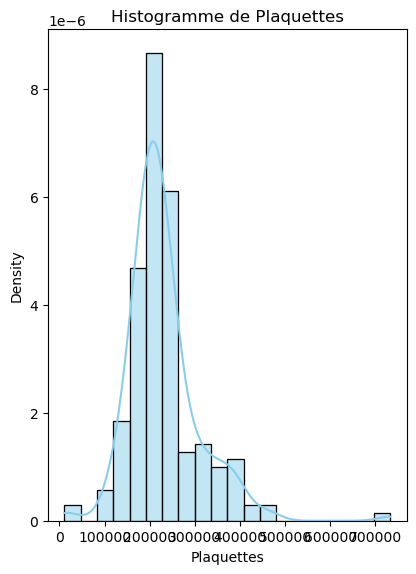

Test de normalité pour TP:
Statistique de Shapiro-Wilk: 0.8426462452153535, p-value: 2.979555639520122e-13
La variable TP ne suit pas une distribution normale (p <= 0.05).


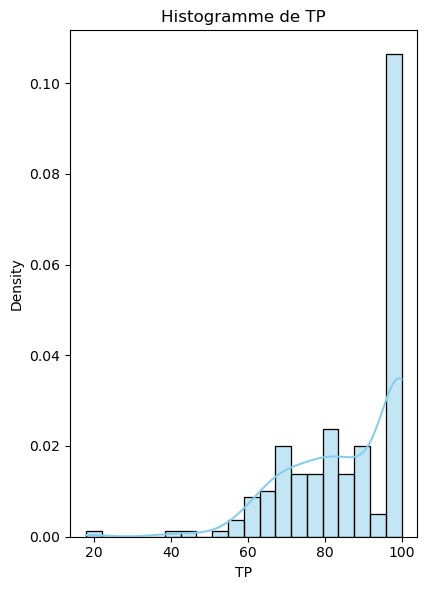

Test de normalité pour INR:
Statistique de Shapiro-Wilk: 0.35809715827188104, p-value: 8.843891708199942e-26
La variable INR ne suit pas une distribution normale (p <= 0.05).


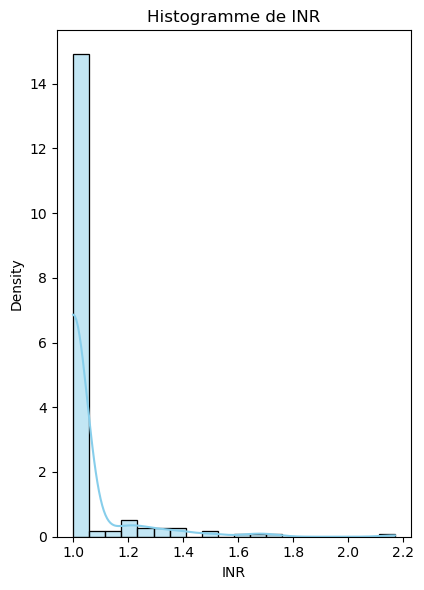

Test de normalité pour NIHSSàlasortie:
Statistique de Shapiro-Wilk: 0.8917840726868683, p-value: 1.1402593927166861e-10
La variable NIHSSàlasortie ne suit pas une distribution normale (p <= 0.05).


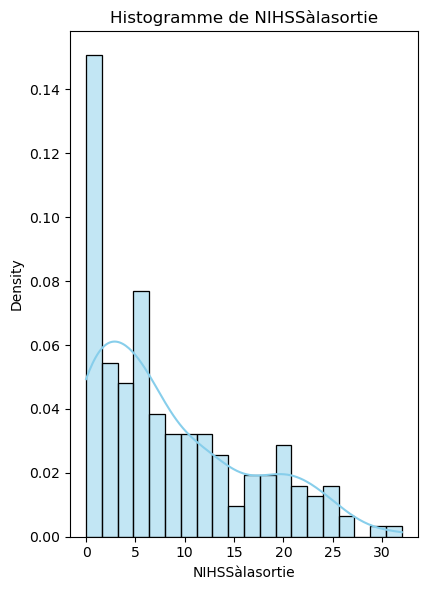

Test de normalité pour RANKINmodifiéà3mois:
Statistique de Shapiro-Wilk: 0.8940221101635812, p-value: 1.5556250578003054e-10
La variable RANKINmodifiéà3mois ne suit pas une distribution normale (p <= 0.05).


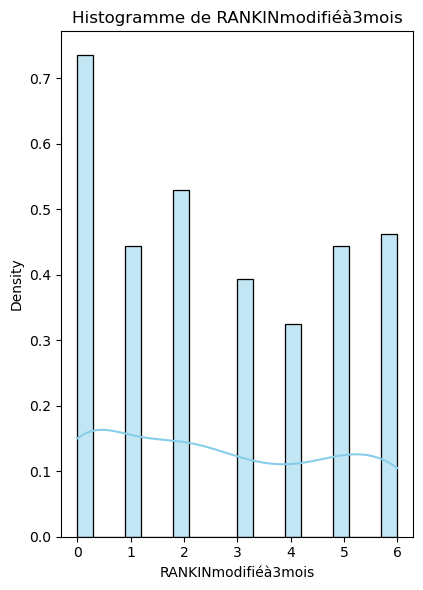

In [10]:
# Tester la normalité et générer des graphiques
from scipy import stats
for col in variables_quantitatives:
    print(f"Test de normalité pour {col}:")
    
    # Test de Shapiro-Wilk
    stat, p_value = stats.shapiro(df[col].dropna())
    print(f"Statistique de Shapiro-Wilk: {stat}, p-value: {p_value}")
    
    if p_value > 0.05:
        print(f"La variable {col} suit une distribution normale (p > 0.05).")
    else:
        print(f"La variable {col} ne suit pas une distribution normale (p <= 0.05).")

    # Histogramme
    plt.figure(figsize=(8, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True, bins=20, color="skyblue", stat="density")
    plt.title(f"Histogramme de {col}")
    plt.tight_layout()
    plt.show()

In [11]:
# Test du Khi-Deux entre thrombolyse et score RANKIN : nombre de groupe à comparer ≤ 2
"""
H₀ : La répartition des scores RANKIN est identique entre les patients ayant reçu la thrombolyse et ceux qui ne l'ont pas reçue.
H₁ : La répartition des scores RANKIN diffère entre les patients ayant reçu la thrombolyse et ceux qui ne l'ont pas reçue.
"""

# 1. Créer un tableau de contingence
tableau_contingence = pd.crosstab(df['RANKINmodifiéà3mois'], df['thrombolyse'])

# 2. Afficher le tableau de contingence
print("Tableau de contingence :")
print(tableau_contingence)

# 3. Effectuer le test du Khi-Deux
stat, p_valeur, dof, expected = stats.chi2_contingency(tableau_contingence)

# 4. Afficher les effectifs attendus
print("\nEffectifs attendus :")
print(expected)

# 5. Résultats du test
print(f"\nStatistique du test du Khi-Deux : {stat}")
print(f"p-valeur : {p_valeur}")

# 6. Interprétation
alpha = 0.05
if p_valeur <= alpha:
    print("On rejette H₀ : Il existe une association significative entre la thrombolyse et les scores RANKIN.")
else:
    print("On ne rejette pas H₀ : Aucune association significative entre la thrombolyse et les scores RANKIN.")

Tableau de contingence :
thrombolyse           0   1
RANKINmodifiéà3mois        
0                    25  18
1                    13  13
2                    14  17
3                    12  11
4                     9  10
5                    15  11
6                    18   9

Effectifs attendus :
[[23.37435897 19.62564103]
 [14.13333333 11.86666667]
 [16.85128205 14.14871795]
 [12.5025641  10.4974359 ]
 [10.32820513  8.67179487]
 [14.13333333 11.86666667]
 [14.67692308 12.32307692]]

Statistique du test du Khi-Deux : 3.6873252793502123
p-valeur : 0.7189027869988827
On ne rejette pas H₀ : Aucune association significative entre la thrombolyse et les scores RANKIN.


Test de normalité (Shapiro-Wilk) :
Test de Shapiro-Wilk (thrombolyse = 0) : p-valeur = 0.0007781311983425785
Test de Shapiro-Wilk (thrombolyse = 1) : p-valeur = 0.15657077653201706


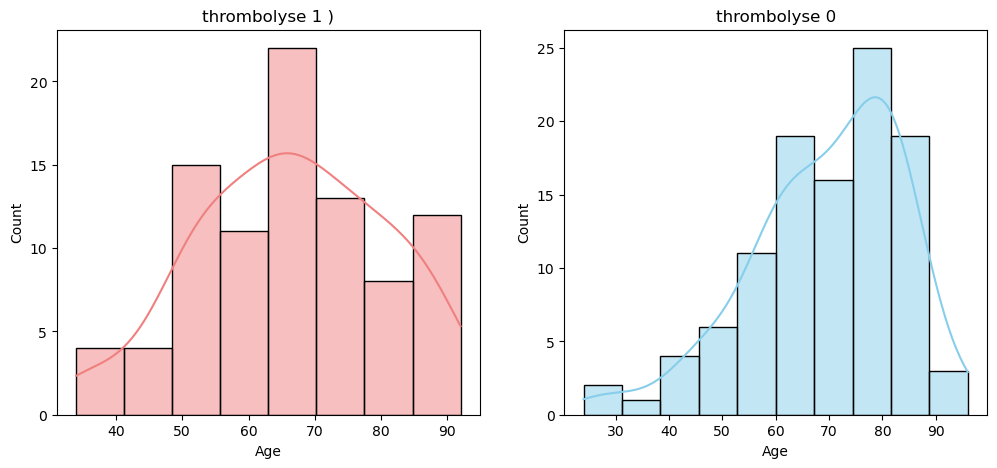


Test de Mann-Whitney :
Statistique = 4043.0
p-value = 0.0860911177005302
On ne rejette pas H₀ : Aucune différence significative dans la répartition de l'âge entre les deux groupes.


In [12]:
#test bilatéral (âge et thrombolyse avec Mann-Whitney) : nombre de groupe à comparer ≤ 2
"""
H₀ : La répartition de l'âge est identique entre les patients ayant reçu la thrombolyse et ceux ne l'ayant pas reçue (μ₁ = μ₂).
H₁ : La répartition de l'âge diffère entre les deux groupes (μ₁ ≠ μ₂).
"""
# 1. Séparer les groupes
age_thrombolyse_0 = df[df['thrombolyse'] == 0]['Age'].dropna()
age_thrombolyse_1 = df[df['thrombolyse'] == 1]['Age'].dropna()

# 2. Tester la normalité (Shapiro-Wilk)
"""
h₀ : Age suit le loi normal.
h₁ : Age ne suit pas le loi normal.
"""
stat_0, p_0 = stats.shapiro(age_thrombolyse_0)
stat_1, p_1 = stats.shapiro(age_thrombolyse_1)

print("Test de normalité (Shapiro-Wilk) :")
print(f"Test de Shapiro-Wilk (thrombolyse = 0) : p-valeur = {p_0}")
print(f"Test de Shapiro-Wilk (thrombolyse = 1) : p-valeur = {p_1}")

# 3. Visualiser les distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(age_thrombolyse_1, kde=True, color="lightcoral")
plt.title("thrombolyse 1 )")

plt.subplot(1, 2, 2)
sns.histplot(age_thrombolyse_0, kde=True, color="skyblue")
plt.title("thrombolyse 0")
plt.show()

# 4. Choix du test selon la normalité
alpha = 0.05

if p_1 > alpha and p_0 > alpha:
    # Si les deux groupes suivent une distribution normale : Test t de Student
    stat, p_value = ttest_ind(age_thrombolyse_1, age_thrombolyse_0)
    test_name = "Test t de Student"
else:
    # Sinon : Test U de Mann-Whitney
    stat, p_value = stats.mannwhitneyu(age_thrombolyse_1, age_thrombolyse_0, alternative='two-sided')
    test_name = "Test de Mann-Whitney"


# 5. Résultat
print(f"\n{test_name} :")
print(f"Statistique = {stat}")
print(f"p-value = {p_value}")
if p_value <= alpha:
    print("On rejette H₀ : Il y a une différence significative dans la répartition de l'âge entre les deux groupes.")
else:
    print("On ne rejette pas H₀ : Aucune différence significative dans la répartition de l'âge entre les deux groupes.")

In [13]:
#test unilatéral (âge et thrombolyse avec Mann-Whitney) : nombre de groupe à comparer ≤ 2
"""
H₀ : L’âge des patients thrombolysés est supérieur ou égal à celui des non-thrombolysés.
H₁ : L’âge des patients thrombolysés est significativement plus faible que celui des non-thrombolysés.
"""

# Test unilatéral : 'less' signifie qu'on teste si le premier groupe a des valeurs plus faibles
stat, p_valeur = stats.mannwhitneyu(age_thrombolyse_1, age_thrombolyse_0, alternative='less')

print(f"Statistique du Test U : {stat}")
print(f"p-valeur : {p_valeur}")

alpha = 0.05
if p_valeur <= alpha:
    print("On rejette H₀ : Les patients thrombolysés sont significativement plus jeunes.")
else:
    print("On ne rejette pas H₀ : Pas de preuve que les patients thrombolysés sont plus jeunes.")

Statistique du Test U : 4043.0
p-valeur : 0.0430455588502651
On rejette H₀ : Les patients thrombolysés sont significativement plus jeunes.


In [14]:
#test bilatéral (âge et RANKINmodifiéà3mois avec kruskal) : nombre de groupe à comparer > 2
"""
H₀ : Les groupes de RANKINmodifiéà3mois ne diffèrent pas par l'âge des patients (μ₁ = μ₂).
H₁ : Les groupes de RANKINmodifiéà3mois diffèrent par l'âge des patients (μ₁ ≠ μ₂).
"""

# 1. Séparer les groupes selon les catégories de RANKINmodifiéà3mois
group_0 = df[df['RANKINmodifiéà3mois'] == 0]['Age'].dropna()
group_1 = df[df['RANKINmodifiéà3mois'] == 1]['Age'].dropna()
group_2 = df[df['RANKINmodifiéà3mois'] == 2]['Age'].dropna()
group_3 = df[df['RANKINmodifiéà3mois'] == 3]['Age'].dropna()
group_4 = df[df['RANKINmodifiéà3mois'] == 4]['Age'].dropna()
group_5 = df[df['RANKINmodifiéà3mois'] == 5]['Age'].dropna()
group_6 = df[df['RANKINmodifiéà3mois'] == 6]['Age'].dropna()

groupes = [group_0, group_1, group_2, group_3, group_4, group_5, group_6]

# 2. Vérification de la normalité de chaque groupe
normalite = []
for i, g in enumerate(groupes):
    pval = stats.shapiro(g).pvalue
    normalite.append(pval > 0.05)
    print(f"Groupe {i} - p-value Shapiro : {pval:.4f}")

# 3. Choix du test
alpha = 0.05
if all(normalite):
    stat, p_value = stats.f_oneway(*groupes)
    test = "ANOVA"
else:
    stat, p_value = stats.kruskal(*groupes)
    test = "Kruskal-Wallis"

# 4. Résultats
print(f"\nTest utilisé : {test}")
print(f"Statistique : {stat:.3f}")
print(f"p-value : {p_value:.4f}")
if p_value <= alpha:
    print("On rejette H₀ : Il y a une différence significative dans la répartition de l'âge entre les groupes de RANKINmodifiéà3mois.")
else:
    print("On ne rejette pas H₀ : Pas de différence significative dans la répartition de l'âge entre les groupes de RANKINmodifiéà3mois.")

Groupe 0 - p-value Shapiro : 0.5095
Groupe 1 - p-value Shapiro : 0.5326
Groupe 2 - p-value Shapiro : 0.5572
Groupe 3 - p-value Shapiro : 0.3805
Groupe 4 - p-value Shapiro : 0.0485
Groupe 5 - p-value Shapiro : 0.0920
Groupe 6 - p-value Shapiro : 0.0180

Test utilisé : Kruskal-Wallis
Statistique : 10.658
p-value : 0.0995
On ne rejette pas H₀ : Pas de différence significative dans la répartition de l'âge entre les groupes de RANKINmodifiéà3mois.


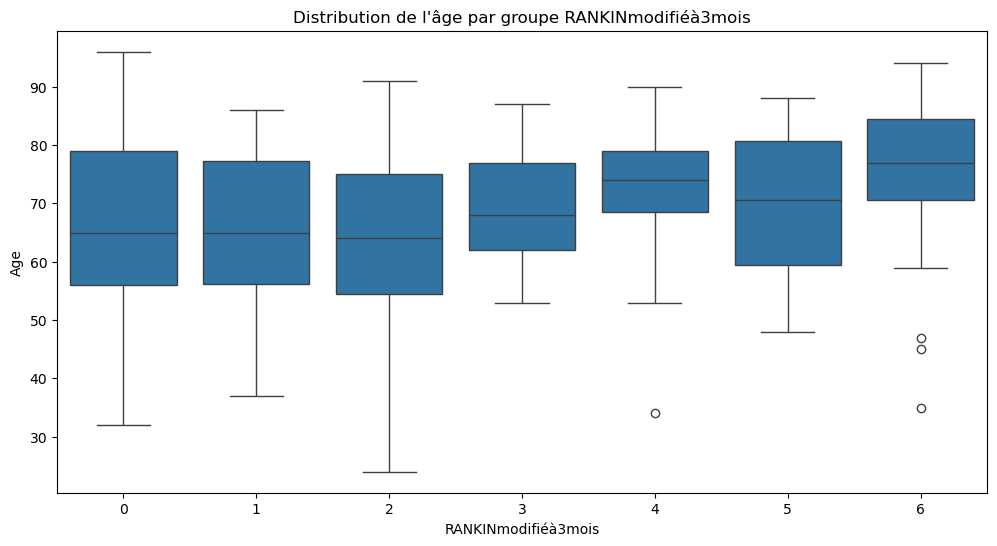

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer boxplot pour visualiser la distribution de l'âge en fonction de RANKINmodifiéà3mois
plt.figure(figsize=(12, 6))
sns.boxplot(x='RANKINmodifiéà3mois', y='Age', data=df)
plt.title('Distribution de l\'âge par groupe RANKINmodifiéà3mois')
plt.show()


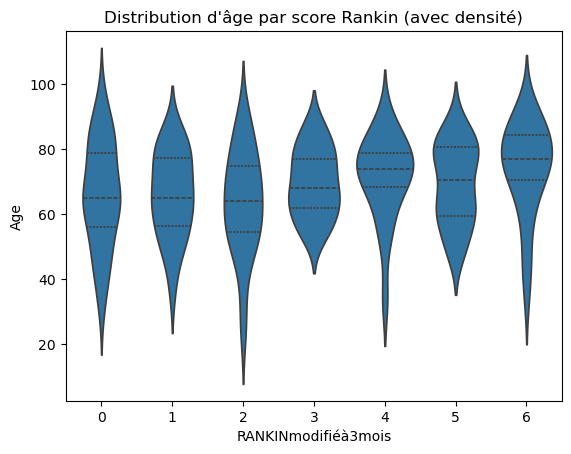

In [16]:
# Créer violinplot pour visualiser la distribution de l'âge en fonction de RANKINmodifiéà3mois
sns.violinplot(x='RANKINmodifiéà3mois', y='Age', data=df, inner='quartile')
plt.title('Distribution d\'âge par score Rankin (avec densité)')
plt.show()

In [17]:
#test bilatéral (âge et AVC avec Khi-Deux) : nombre de groupe à comparer ≤ 2
"""
H₀ : Les deux variables âge et AVC sont indépendantes.
H₁ : Les deux variables âge et AVC sont dépendantes.
"""
# 1. Créer un tableau de contingence
tableau_contingence = pd.crosstab(df['AVC'], df['RANKINmodifiéà3mois'])
print("Tableau de contingence :")
print(tableau_contingence)

# 2. Effectuer le test du Khi-Deux
stat, p_valeur, dof, expected = stats.chi2_contingency(tableau_contingence)

print(f"Statistique du test du Khi-Deux : {stat}")
print(f"p-valeur : {p_valeur}")

# 3. Interprétation
alpha = 0.05
if p_valeur <= alpha:
    print("On rejette H₀ : Il existe une association entre le type d'AVC et le score de Rankin modifié à 3 mois.")
else:
    print("On ne rejette pas H₀ : Pas d'association significative entre le type d'AVC et le score de Rankin modifié à 3 mois.")

Tableau de contingence :
RANKINmodifiéà3mois   0   1   2   3   4   5   6
AVC                                            
0                    41  25  29  16  15  18  18
1                     2   1   2   7   4   8   9
Statistique du test du Khi-Deux : 22.12065023484912
p-valeur : 0.001151398050570686
On rejette H₀ : Il existe une association entre le type d'AVC et le score de Rankin modifié à 3 mois.


Test de normalité (Shapiro-Wilk) :
AVC = 1 : p-value = 0.7032757897565199
AVC = 0 : p-value = 4.93370099588876e-07


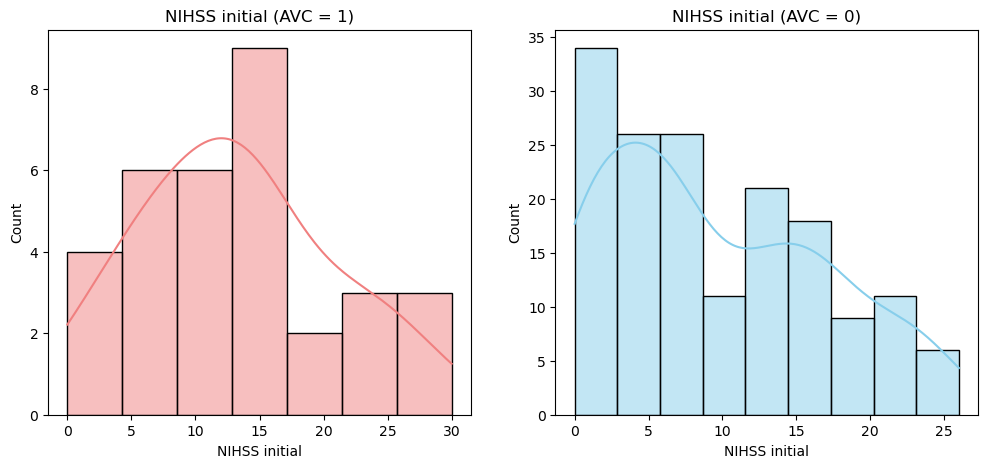


Test de Mann-Whitney :
Statistique = 3404.0
p-value = 0.013304348541386771
On rejette H₀ : Le score NIHSS diffère significativement entre les patients avec et sans AVC.


In [18]:
#test bilatéral (NIHSS et AVC avec mannwhitneyu) : nombre de groupe à comparer ≤ 2
"""
H₀ : La distribution du score NIHSS est la même chez les patients avec et sans AVC (distributions identiques).
H₁ : La distribution du score NIHSS est différente entre les deux groupes.
"""
# 1. Séparer les groupes
nihss_avc_1 = df[df['AVC'] == 1]['NIHSS initial'].dropna()
nihss_avc_0 = df[df['AVC'] == 0]['NIHSS initial'].dropna()

# 2. Tester la normalité (Shapiro-Wilk)
stat_1, p_1 = stats.shapiro(nihss_avc_1)
stat_0, p_0 = stats.shapiro(nihss_avc_0)

print("Test de normalité (Shapiro-Wilk) :")
print(f"AVC = 1 : p-value = {p_1}")
print(f"AVC = 0 : p-value = {p_0}")

# 3. Visualiser les distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(nihss_avc_1, kde=True, color="lightcoral")
plt.title("NIHSS initial (AVC = 1)")

plt.subplot(1, 2, 2)
sns.histplot(nihss_avc_0, kde=True, color="skyblue")
plt.title("NIHSS initial (AVC = 0)")
plt.show()

# 4. Choix du test selon la normalité
alpha = 0.05

if p_1 > alpha and p_0 > alpha:
    # Si les deux groupes suivent une distribution normale : Test t de Student
    stat, p_value = stats.ttest_ind(nihss_avc_1, nihss_avc_0)
    test_name = "Test t de Student"
else:
    # Sinon : Test U de Mann-Whitney
    stat, p_value = stats.mannwhitneyu(nihss_avc_1, nihss_avc_0, alternative='two-sided')
    test_name = "Test de Mann-Whitney"

# 5. Résultat
print(f"\n{test_name} :")
print(f"Statistique = {stat}")
print(f"p-value = {p_value}")
if p_value <= alpha:
    print("On rejette H₀ : Le score NIHSS diffère significativement entre les patients avec et sans AVC.")
else:
    print("On ne rejette pas H₀ : Pas de différence significative du score NIHSS selon la présence d'un AVC.")

In [19]:
#test uniléteral (Tabac et alcool avec Khi-Deux) : nombre de groupe à comparer ≤ 2
"""
H₀ : Les deux variables Tabac et alcool sont indépendantes.
H₁ : Les deux variables Tabac et alcool sont dépendantes (associées).
"""
# 1. Créer un tableau de contingence
tableau_contingence = pd.crosstab(df['Tabac'], df['alcool'])
print("Tableau de contingence :")
print(tableau_contingence)

# 2. Effectuer le test du Khi-Deux
stat, p_valeur, dof, expected = stats.chi2_contingency(tableau_contingence)

print(f"Statistique du test du Khi-Deux : {stat}")
print(f"p-valeur : {p_valeur}")

# 3. Interprétation
alpha = 0.05
if p_valeur <= alpha:
    print("On rejette H₀ : Il existe une association entre Tabac et alcool.")
else:
    print("On ne rejette pas H₀ : Pas d'association significative entre Tabac et alcool.")

Tableau de contingence :
alcool    0   1
Tabac          
0       125   1
1        58  11
Statistique du test du Khi-Deux : 15.189596909683333
p-valeur : 9.723763671391619e-05
On rejette H₀ : Il existe une association entre Tabac et alcool.


In [20]:
#test uniléteral (Mortalité et TDMcàH24 avec Khi-Deux) : nombre de groupe à comparer ≤ 2
"""
H₀ : Les deux variables TDMcàH24 et Mortalité sont indépendantes.
H₁ : Les deux variables TDMcàH24 et Mortalité sont dépendantes.
"""
# 1. Créer un tableau de contingence
tableau_contingence = pd.crosstab(df['TDMcàH24'], df['Mortalité'])
print("Tableau de contingence :")
print(tableau_contingence)

# 2. Effectuer le test du Khi-Deux
stat, p_valeur, dof, expected = stats.chi2_contingency(tableau_contingence)

print(f"Statistique du test du Khi-Deux : {stat}")
print(f"p-valeur : {p_valeur}")

# 3. Interprétation
alpha = 0.05
if p_valeur <= alpha:
    print("On rejette H₀ : Il existe une association entre TDMcàH24 et Mortalité.")
else:
    print("On ne rejette pas H₀ : Pas d'association significative entre TDMcàH24 et Mortalité.")

Tableau de contingence :
Mortalité    0   1
TDMcàH24          
0          115   8
1           50  22
Statistique du test du Khi-Deux : 18.37608170115792
p-valeur : 1.8131982833805294e-05
On rejette H₀ : Il existe une association entre TDMcàH24 et Mortalité.


In [21]:
#test uniléteral (NIHSS initial et NIHSS sortie avec test de correlation) : nombre de groupe à comparer ≤ 2

# 1. Vérifier la normalité des deux variables
p1 = stats.shapiro(df['NIHSS initial'].dropna()).pvalue
p2 = stats.shapiro(df['NIHSSàlasortie'].dropna()).pvalue

# 2. Choix du test
if p1 > 0.05 and p2 > 0.05:
    # Corrélation de Pearson si normalité
    corr, p_val = stats.pearsonr(df['NIHSS initial'].dropna(), df['NIHSSàlasortie'].dropna())
    name = "Corrélation de Pearson"
else:
    # Corrélation de Spearman si non normalité
    corr, p_val = stats.spearmanr(df['NIHSS initial'].dropna(), df['NIHSSàlasortie'].dropna())
    name = "Corrélation de Spearman"

print(f"Coefficient de corrélation, {name}: {corr:.3f}, p-value : {p_val:.3f}")
if(corr > 0) :
    print("Un NIHSS initial élevé prédit un NIHSS à la sortie élevé.")
else :
    print("Un NIHSS initial élevé ne prédit pas un NIHSS à la sortie élevé.")

Coefficient de corrélation, Corrélation de Spearman: 0.863, p-value : 0.000
Un NIHSS initial élevé prédit un NIHSS à la sortie élevé.


p-value Shapiro NIHSS sortie (NIHSS initial ≤ 10) : 0.0000
p-value Shapiro NIHSS sortie (NIHSS initial > 10) : 0.0950


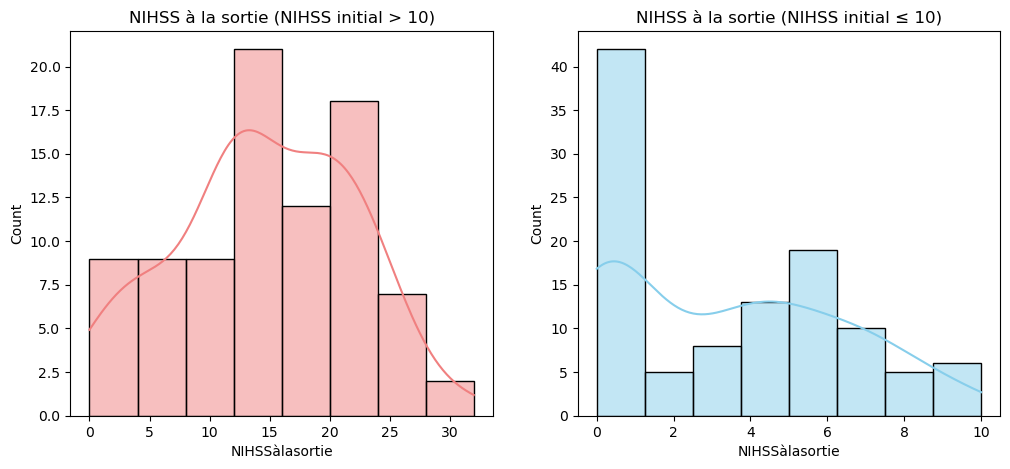


Test de Mann-Whitney unilatéral :
Statistique = 8442.0000
p-value = 0.0000
Rejet de H₀ : Le NIHSS à la sortie est significativement plus élevé pour les patients avec NIHSS initial > 10.


In [22]:
# Test unilatéral (NIHSS initial et NIHSS sortie avec Mann-Whitney) : nombre de groupes à comparer ≤ 2
"""
H₀ : NIHSS à la sortie des patients avec NIHSS initial ≤ 10 est supérieur ou égal à celui des patients avec NIHSS initial > 10.
H₁ : NIHSS à la sortie des patients avec NIHSS initial > 10 est significativement plus élevé.
"""

# 1. Séparer les groupes selon NIHSS initial
groupe_bas = df.loc[df['NIHSS initial'] <= 10, 'NIHSSàlasortie'].dropna()
groupe_haut = df.loc[df['NIHSS initial'] > 10, 'NIHSSàlasortie'].dropna()

# 2. Tester la normalité (Shapiro-Wilk)
p_bas = stats.shapiro(groupe_bas).pvalue
p_haut = stats.shapiro(groupe_haut).pvalue

print(f"p-value Shapiro NIHSS sortie (NIHSS initial ≤ 10) : {p_bas:.4f}")
print(f"p-value Shapiro NIHSS sortie (NIHSS initial > 10) : {p_haut:.4f}")

# 3. Visualiser les distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(groupe_haut, kde=True, color="lightcoral")
plt.title("NIHSS à la sortie (NIHSS initial > 10)")

plt.subplot(1, 2, 2)
sns.histplot(groupe_bas, kde=True, color="skyblue")
plt.title("NIHSS à la sortie (NIHSS initial ≤ 10)")

plt.show()

# 4. Choix du test selon normalité
alpha = 0.05

if p_bas > alpha and p_haut > alpha:
    # Test t de Student unilatéral (greater)
    stat, p_value = stats.ttest_ind(groupe_haut, groupe_bas, alternative='greater')
    test_name = "Test t de Student unilatéral"
else:
    # Test U de Mann-Whitney unilatéral (greater)
    stat, p_value = stats.mannwhitneyu(groupe_haut, groupe_bas, alternative='greater')
    test_name = "Test de Mann-Whitney unilatéral"

# 5. Résultats
print(f"\n{test_name} :")
print(f"Statistique = {stat:.4f}")
print(f"p-value = {p_value:.4f}")

if p_value <= alpha:
    print("Rejet de H₀ : Le NIHSS à la sortie est significativement plus élevé pour les patients avec NIHSS initial > 10.")
else:
    print("Pas de rejet de H₀ : Aucune preuve que le NIHSS à la sortie est plus élevé pour les patients avec NIHSS initial > 10.")

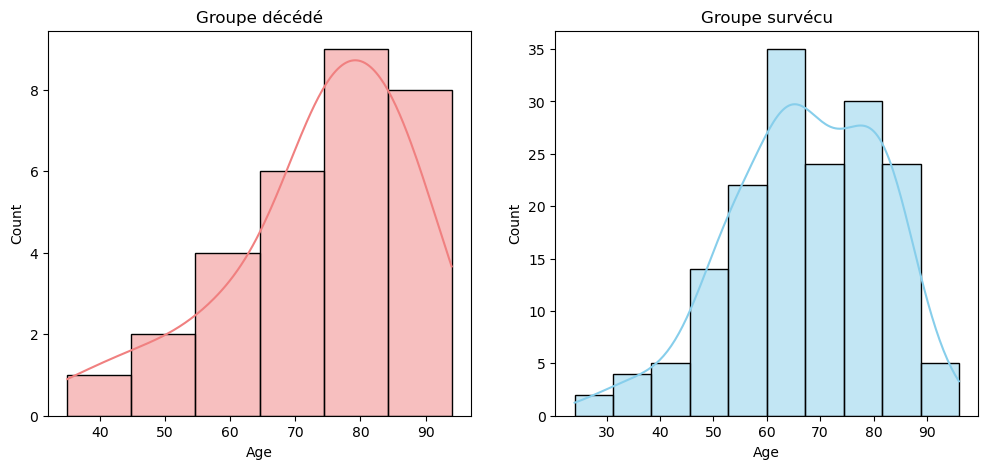


Test de Mann-Whitney :
Statistique = 1755.5
p-value = 0.011419233983833398
On rejette H₀ : Il existe une différence significative d'âge entre les patients décédés et ceux qui ont survécu.


In [23]:
#test uniléteral (Age et Mortalité avec test de Mann-Whitney) : nombre de groupe à comparer ≤ 2
"""
H₀ : Il n'y a pas de différence significative d'âge entre les patients décédés et les patients survivants.
H₁ : Il y a une différence significative d'âge entre les patients décédés et les patients survivants.
"""
# Exemple : supposer que df est votre DataFrame avec 'mortalite' et 'age'
# 'mortalite' = 1 (décédé), 0 (survécu), 'age' = variable continue

# Séparation des groupes en fonction de la mortalité
groupe_survécu = df['Age'][df['Mortalité'] == 0].dropna()
groupe_décédé = df['Age'][df['Mortalité'] == 1].dropna()

# Tester la normalité (Shapiro-Wilk)
p1 = stats.shapiro(groupe_survécu).pvalue
p2 = stats.shapiro(groupe_décédé).pvalue

# 3. Visualiser les distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(groupe_décédé, kde=True, color="lightcoral")
plt.title("Groupe décédé")

plt.subplot(1, 2, 2)
sns.histplot(groupe_survécu, kde=True, color="skyblue")
plt.title("Groupe survécu")
plt.show()

# Choix du test selon la normalité
alpha = 0.05

if p1 > alpha and p2 > alpha:
    # Si les deux groupes suivent une distribution normale : Test t de Student
    stat, p_value = stats.ttest_ind(groupe_survécu, groupe_décédé)
    test_name = "Test t de Student"
else:
    # Sinon : Test U de Mann-Whitney
    stat, p_value = stats.mannwhitneyu(groupe_survécu, groupe_décédé, alternative='two-sided')
    test_name = "Test de Mann-Whitney"

# Résultats
print(f"\n{test_name} :")
print(f"Statistique = {stat}")
print(f"p-value = {p_value}")
if p_value <= alpha:
    print("On rejette H₀ : Il existe une différence significative d'âge entre les patients décédés et ceux qui ont survécu.")
else:
    print("On ne rejette pas H₀ : Pas de différence significative d'âge entre les patients décédés et ceux qui ont survécu.")

p-value pour groupe 1 (Age < 50) : 0.025509510935938978
p-value pour groupe 2 (50 <= Age <= 70) : 0.0008997191171584047
p-value pour groupe 3 (Age > 70) : 0.0004787164082925617


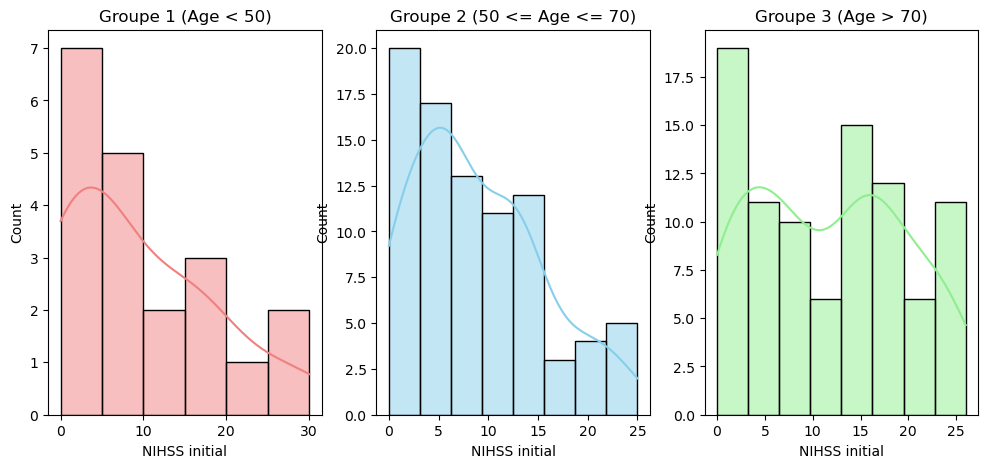


Kruskal-Wallis :
Statistique = 6.048407111744452
p-value = 0.04859651026638484
On rejette H₀ : Il existe une différence significative entre les groupes d'age.


In [24]:
#test uniléteral (Age et NIHSS initial avec test de Kruskal-Wallis) : nombre de groupe à comparer > 2
"""
H₀ : Il n'y a pas de différence significative dans le score NIHSS initial entre les différents groupes d'âge.
H₁ : Il existe une différence significative dans le score NIHSS initial entre les différents groupes d'âge.
"""

# Créer des groupes d'âge
groupe_1 = df[df['Age'] < 50]['NIHSS initial'].dropna()
groupe_2 = df[(df['Age'] >= 50) & (df['Age'] <= 70)]['NIHSS initial'].dropna()
groupe_3 = df[df['Age'] > 70]['NIHSS initial'].dropna()

# Tester la normalité pour chaque groupe
p1 = stats.shapiro(groupe_1).pvalue
p2 = stats.shapiro(groupe_2).pvalue
p3 = stats.shapiro(groupe_3).pvalue

print(f"p-value pour groupe 1 (Age < 50) : {p1}")
print(f"p-value pour groupe 2 (50 <= Age <= 70) : {p2}")
print(f"p-value pour groupe 3 (Age > 70) : {p3}")

# 3. Visualiser les distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(groupe_1, kde=True, color="lightcoral")
plt.title("Groupe 1 (Age < 50)")

plt.subplot(1, 3, 2)
sns.histplot(groupe_2, kde=True, color="skyblue")
plt.title("Groupe 2 (50 <= Age <= 70)")

plt.subplot(1, 3, 3)
sns.histplot(groupe_3, kde=True, color="lightgreen")
plt.title("Groupe 3 (Age > 70)")
plt.show()

# Choisir le test en fonction de la normalité
alpha = 0.05

if p1 > alpha and p2 > alpha and p3 > alpha:
    # Si les trois groupes suivent une distribution normale : ANOVA
    stat, p_value = stats.f_oneway(groupe_1, groupe_2, groupe_3)
    test_name = "ANOVA"
else:
    # Sinon : Kruskal-Wallis
    stat, p_value = stats.kruskal(groupe_1, groupe_2, groupe_3)
    test_name = "Kruskal-Wallis"

# Affichage des résultats
print(f"\n{test_name} :")
print(f"Statistique = {stat}")
print(f"p-value = {p_value}")

if p_value <= alpha:
    print("On rejette H₀ : Il existe une différence significative entre les groupes d'age.")
else:
    print("On ne rejette pas H₀ : Aucune différence significative entre les groupes d'age.")